# Student Performance Indicator

Life cycle of Machine learning Project
1. Understanding the Problem Statement
2. Data Collection
3. Data Checks to perform
4. Exploratory data analysis
5. Data Pre-Processing
6. Model Training
7. Choose best model

 1) Problem statement
 
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection

1. Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
2. The data consists of 8 column and 1000 rows.

2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [11]:
df = pd.read_csv('data/stud.csv')

In [12]:
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

Shape of the Dataset

In [13]:
unique_vars_per_col = {}
for column in df.columns:
    if df[column].dtypes == "object":
        unique_vars = df[column].unique()
        unique_vars_per_col[column] = unique_vars

for column, unique_vars in unique_vars_per_col.items():
    print(f"Column '{column}': {unique_vars}")

Column 'gender': ['female' 'male']
Column 'race_ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E']
Column 'parental_level_of_education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Column 'lunch': ['standard' 'free/reduced']
Column 'test_preparation_course': ['none' 'completed']


# **************-------------------******************

In [14]:
# Iterate through object columns and use value_counts function

for column in df.select_dtypes(include='object').columns:
    value_counts = df[column].value_counts()
    print(f"Value counts for Column '{column}':\n{value_counts}\n")

Value counts for Column 'gender':
gender
female    518
male      482
Name: count, dtype: int64

Value counts for Column 'race_ethnicity':
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

Value counts for Column 'parental_level_of_education':
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Value counts for Column 'lunch':
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

Value counts for Column 'test_preparation_course':
test_preparation_course
none         642
completed    358
Name: count, dtype: int64



2.2 Dataset information

gender : sex of students -> (Male/female)

race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)

parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)

lunch : having lunch before test (standard or free/reduced)

test preparation course : complete or not complete before test

math score

reading score

writing score

3. Data Checks to perform

Check Missing values

Check Duplicates

Check data type

Check the number of unique values of each column

Check statistics of data set

Check various categories present in the different categorical column

In [15]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

No missing values in dataset

In [16]:
# Duplicates
df.duplicated().sum()

0

No duplicates in Dataset

In [17]:
#Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [18]:
# Number of unique values in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [19]:
#statistics
df.describe()

math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Insight

From above description of numerical data, all means are very close to each other - between 66 and 68.05;

All standard deviations are also close - between 14.6 and 15.19;

While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

# Exploring Data

In [20]:
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [21]:
unique_vars_per_col = {}
for column in df.columns:
    if df[column].dtypes == "object":
        unique_vars = df[column].unique()
        unique_vars_per_col[column] = unique_vars

for column, unique_vars in unique_vars_per_col.items():
    print(f"Column '{column}': {unique_vars}")

Column 'gender': ['female' 'male']
Column 'race_ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E']
Column 'parental_level_of_education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Column 'lunch': ['standard' 'free/reduced']
Column 'test_preparation_course': ['none' 'completed']


In [22]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

print(f"We have {len(numeric_features)} numeric_features {numeric_features} ")
print(f"We have {len(categorical_features)} categorical_features {categorical_features}")

We have 3 numeric_features ['math_score', 'reading_score', 'writing_score'] 
We have 5 categorical_features ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


# **************-------------------******************

In [23]:
########### Use in-built functions as it's more reliable and faster

categorical_features = df.select_dtypes(include='object')
numeric_features = df.select_dtypes(exclude='object')
print(f"We have {len(numeric_features.columns)} numeric_features {numeric_features.columns} ")
print(f"We have {len(categorical_features.columns)} categorical_features {categorical_features.columns}")

We have 3 numeric_features Index(['math_score', 'reading_score', 'writing_score'], dtype='object') 
We have 5 categorical_features Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


In [24]:
df['Total_Score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average'] = df['Total_Score']/3
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   Total_Score    Average  
0          218  72.666667  
1          247  82.333333  
2          278  92.666667  
3          148  49.333333  
4          229  76.333333

In [25]:
reading_full = df[df['reading_score'] == 100]['Average'].count()
writing_full = df[df['writing_score'] == 100]['Average'].count()
math_full = df[df['math_score'] == 100]['Average'].count()

print("Number of students with full marks in Maths:" ,math_full)
print("Number of students with full marks in Reading:" ,reading_full)
print("Number of students with full marks in Writing:" ,writing_full)


Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [26]:
reading_less_20 = df[df['reading_score']<=20]['Average'].count()
writing_less_20 = df[df['writing_score']<=20]['Average'].count()
math_less_20 = df[df['math_score']<=20]['Average'].count()

print("Number of students with less than 20 marks in Maths:",math_less_20)
print("Number of students with less than 20 marks in Reading:",reading_less_20)
print("Number of students with less than 20 marks in Writing:",writing_less_20)

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3


# Check the distribution of all numerical data

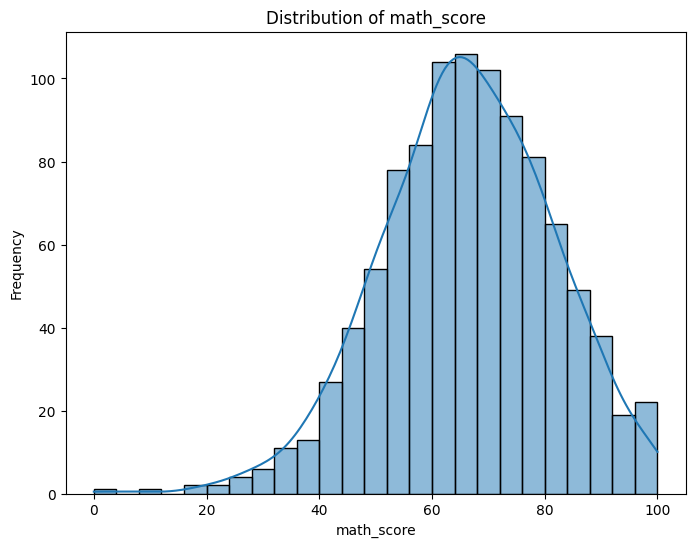

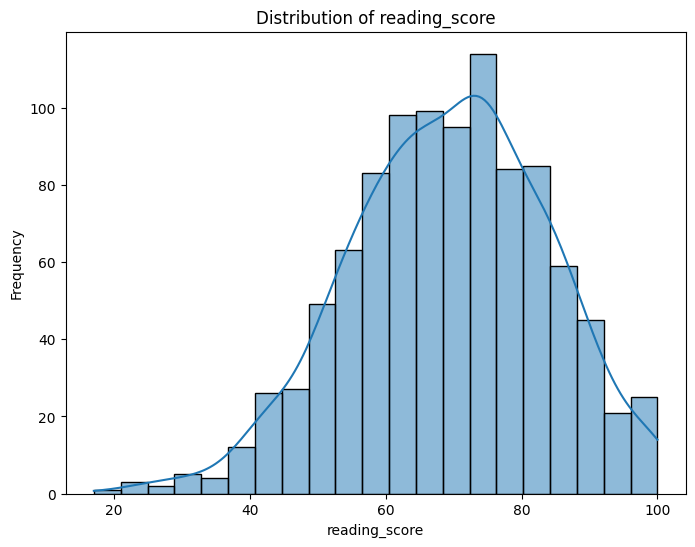

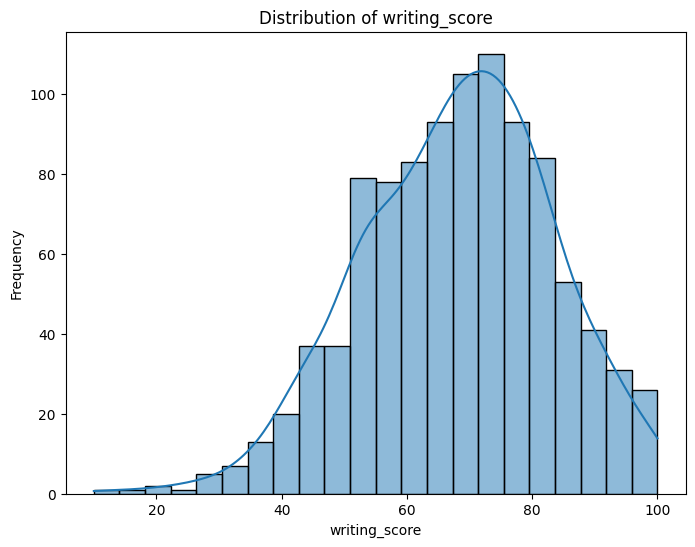

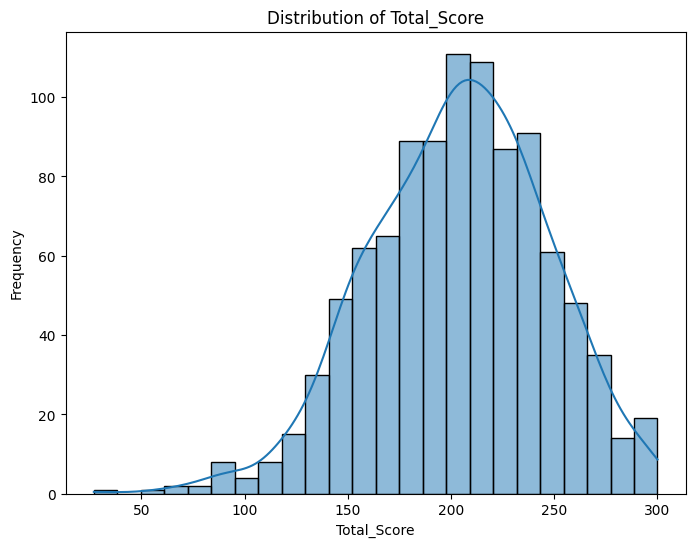

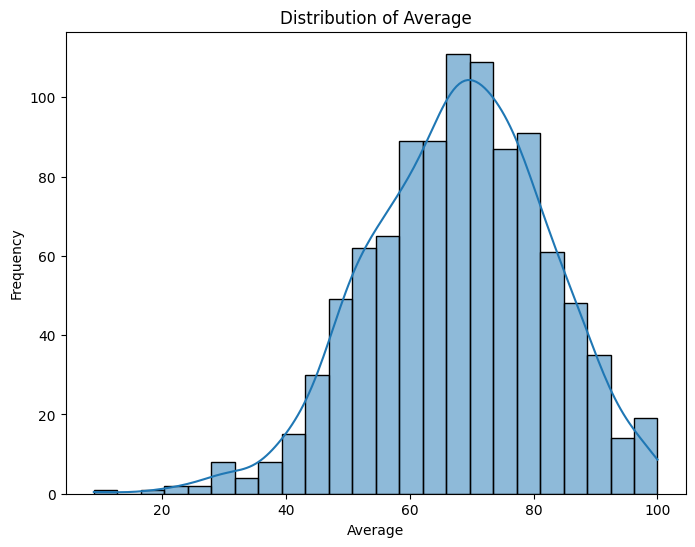

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Plot distribution for each numerical column
for column in numerical_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=numerical_columns, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


## Relationship of Numerical Variables with Target Variable ('Total_Score') - KDE and Scatterplot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


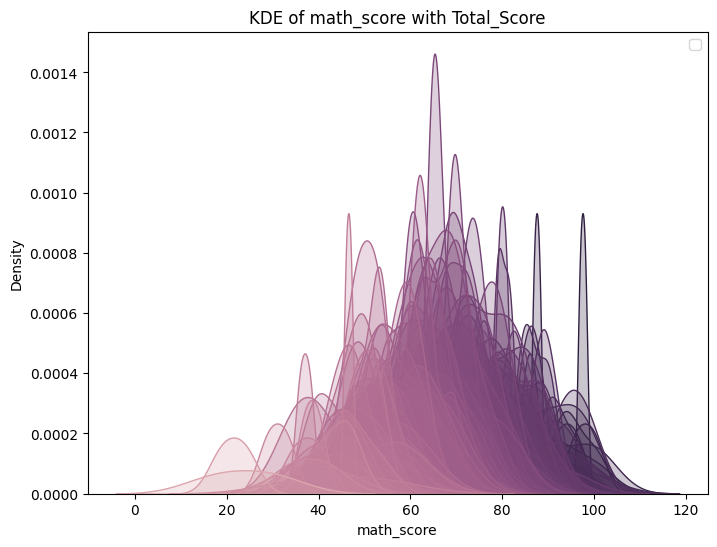

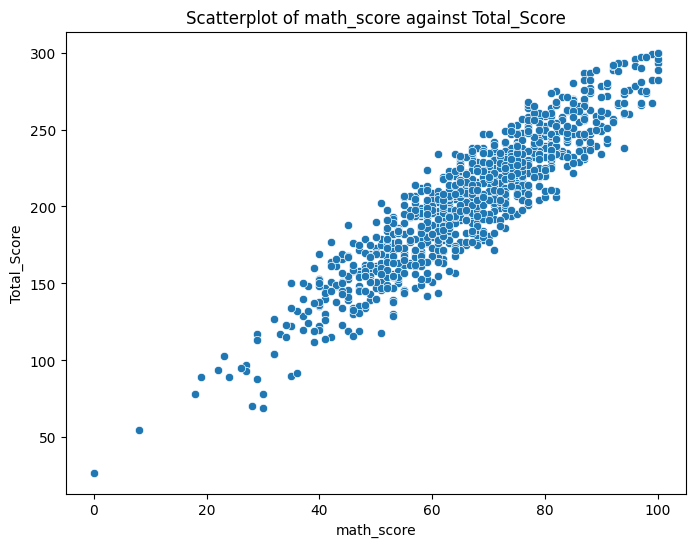

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


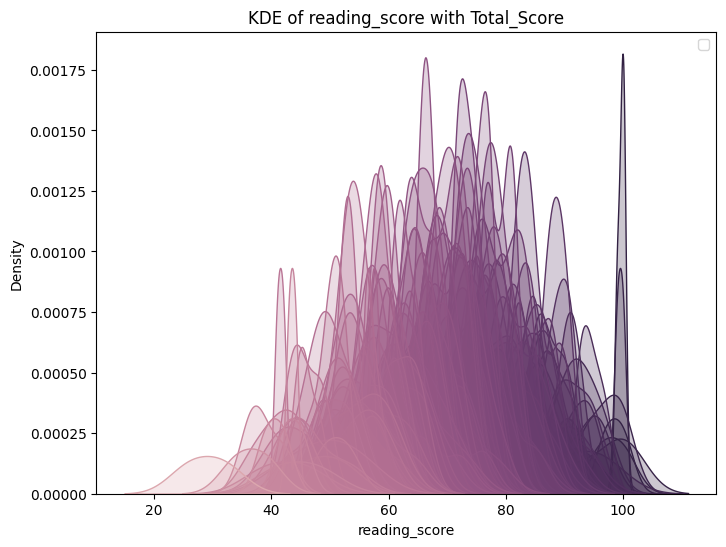

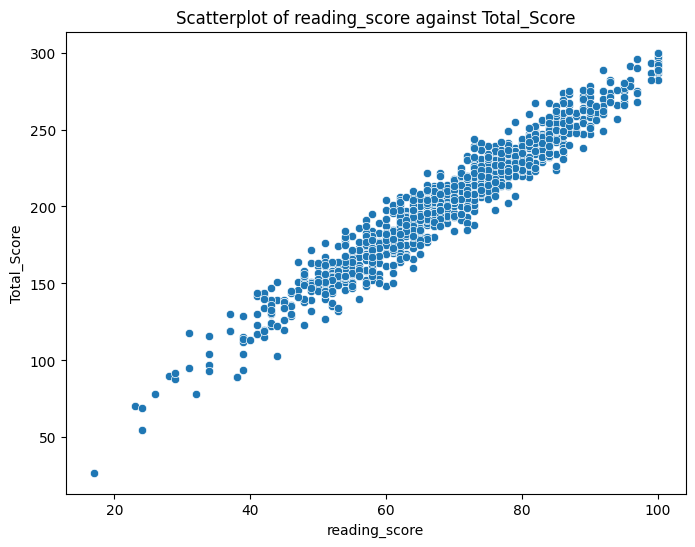

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


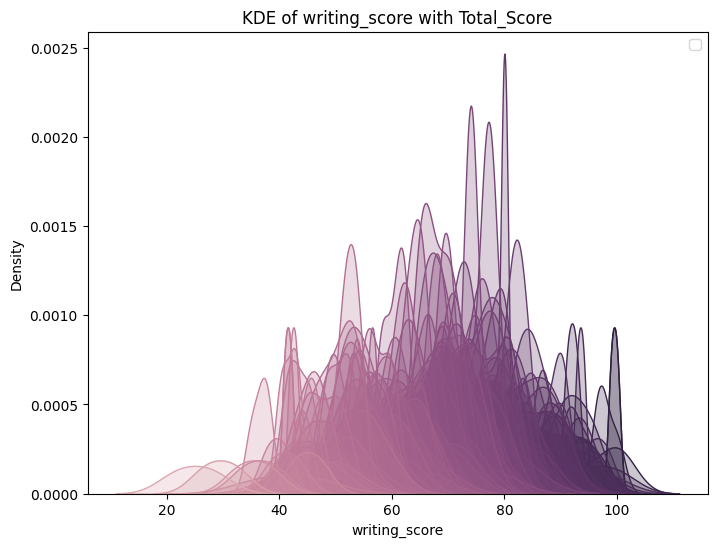

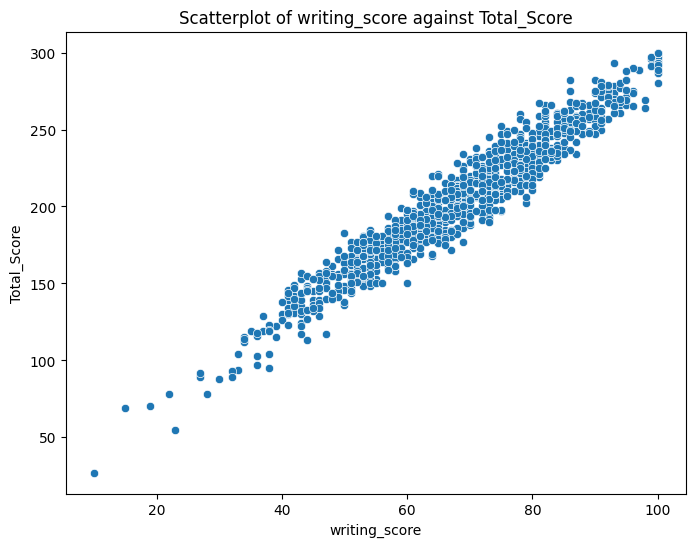

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


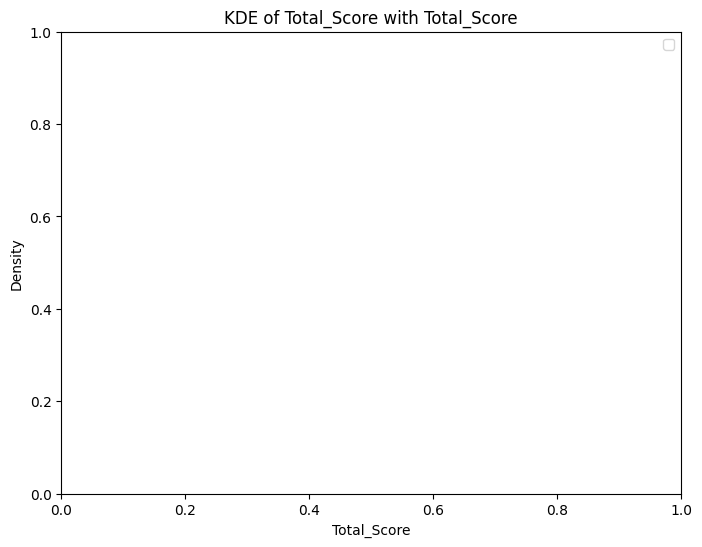

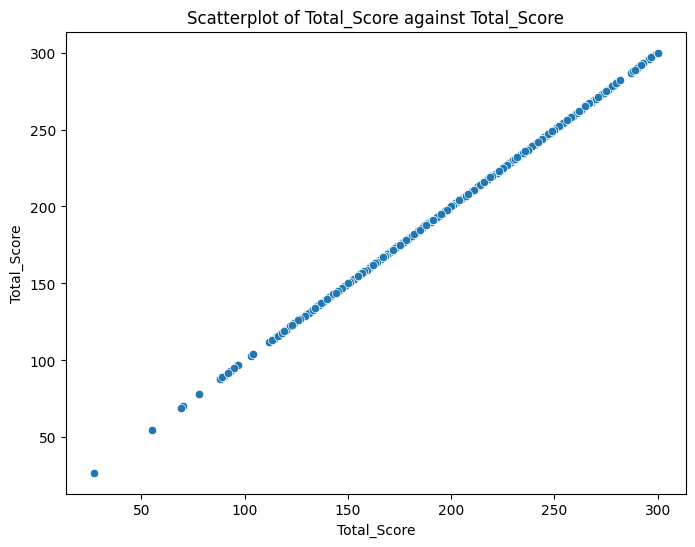

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


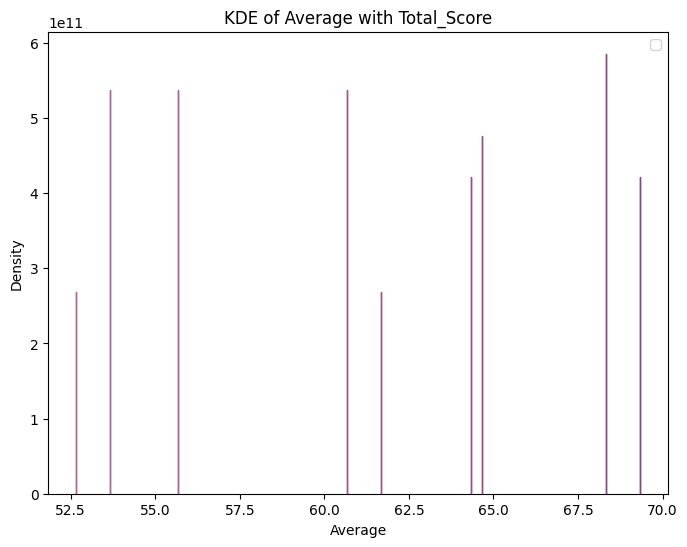

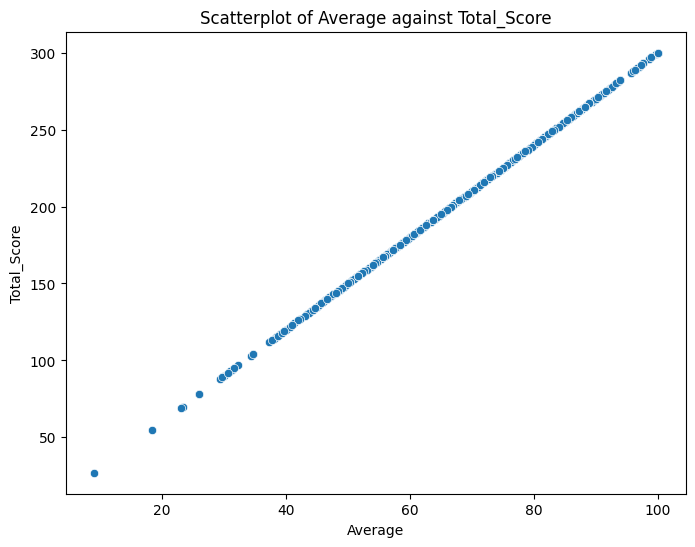

In [28]:
# Relationship with Target Variable ('Total_Score') - KDE and Scatterplot
target_variable_name = 'Total_Score'

for column in numerical_columns.columns:
    plt.figure(figsize=(8, 6))
    
    # KDE plot
    sns.kdeplot(data=df, x=column, hue=target_variable_name, fill=True)
    plt.title(f'KDE of {column} with {target_variable_name}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(8, 6))
    
    # Scatterplot
    sns.scatterplot(data=df, x=column, y=target_variable_name)
    plt.title(f'Scatterplot of {column} against {target_variable_name}')
    plt.xlabel(column)
    plt.ylabel(target_variable_name)
    plt.show()


## Visualize Categorical Features with Bar Plots

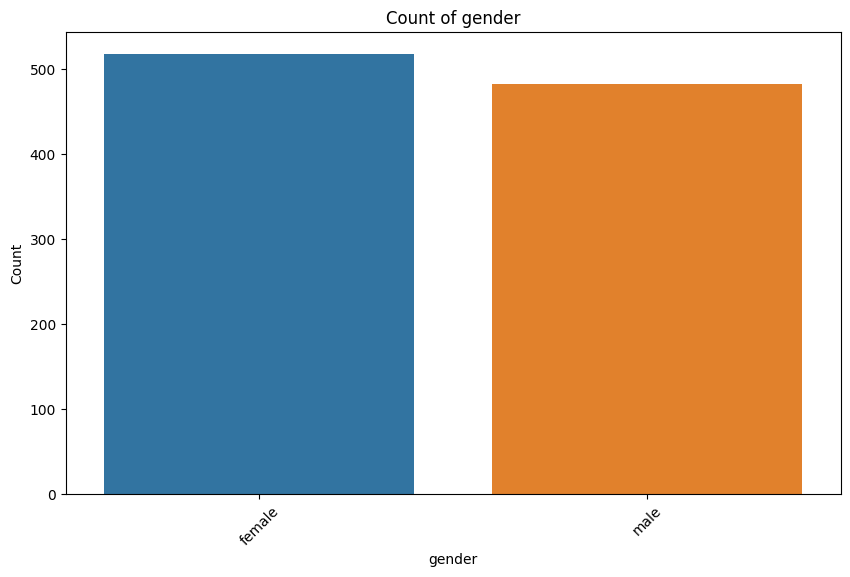

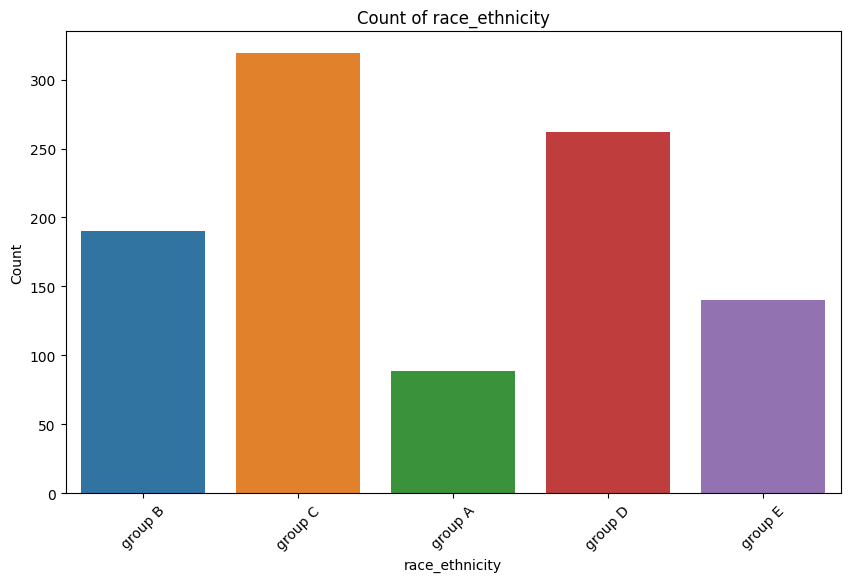

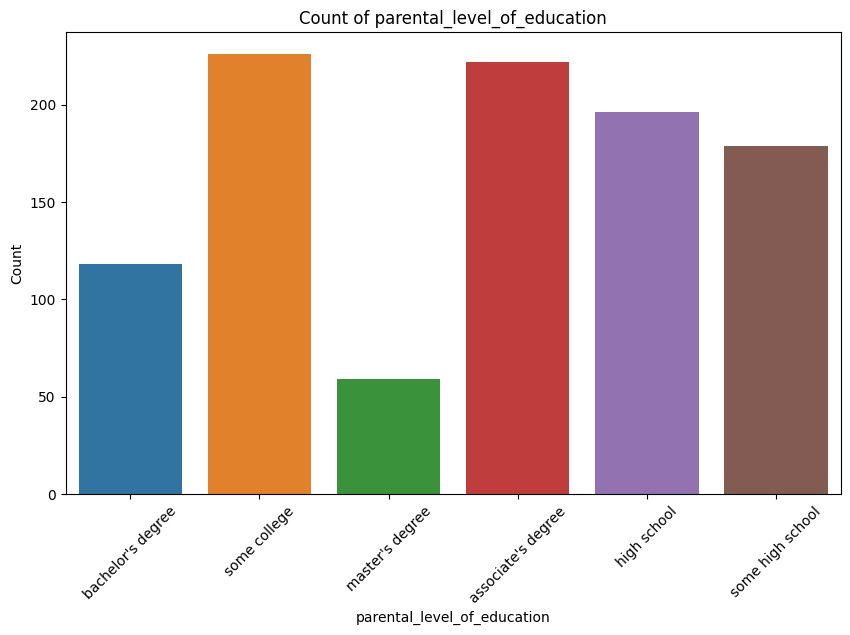

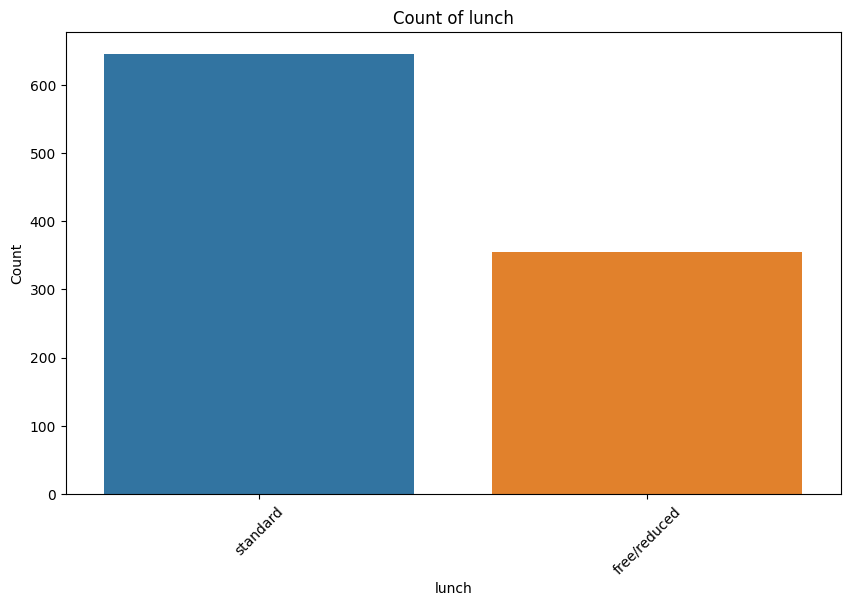

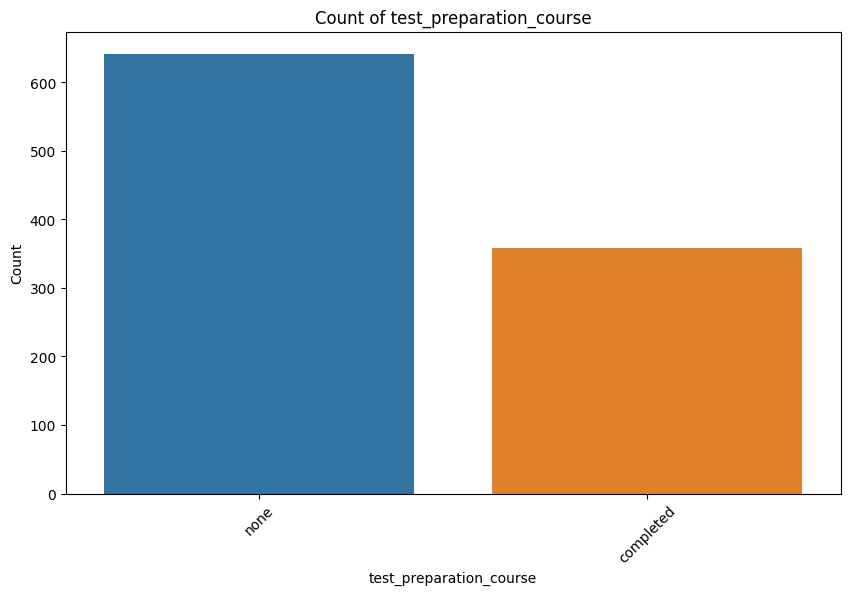

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot bar plots for categorical features
for column in categorical_features.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


### Visualize Categorical Variable Relationship with Target Variable ('Total_Score') - Bar Plot

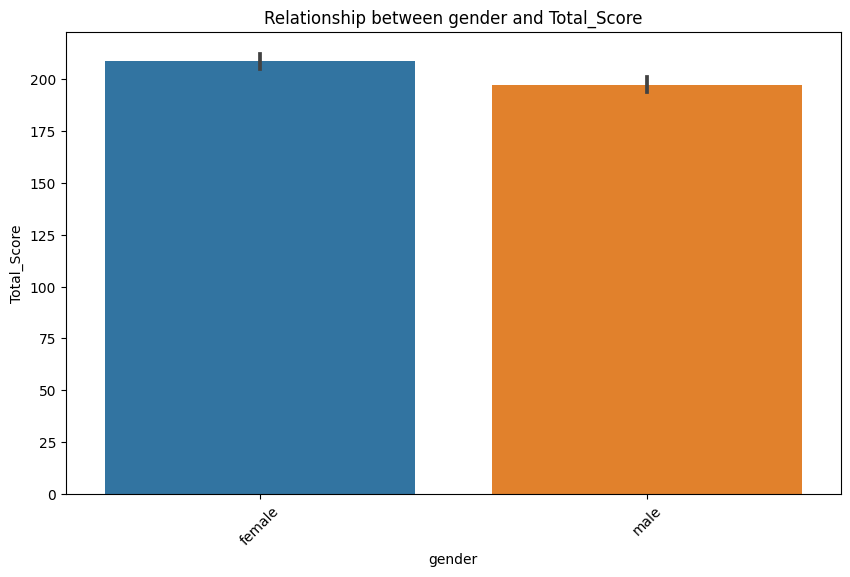

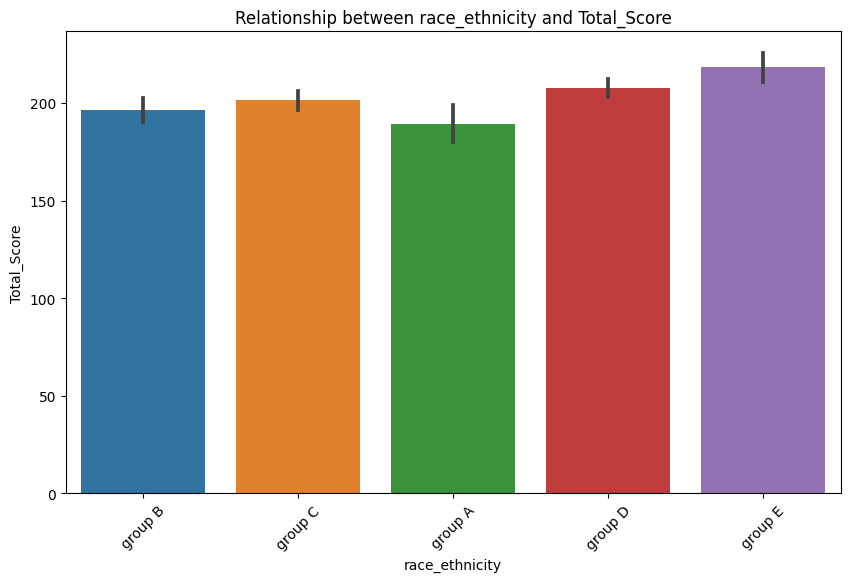

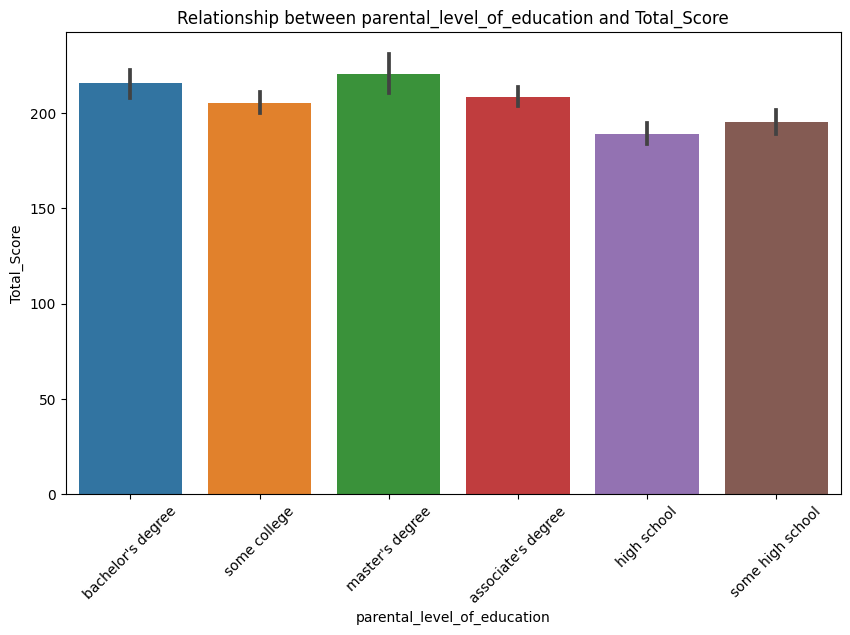

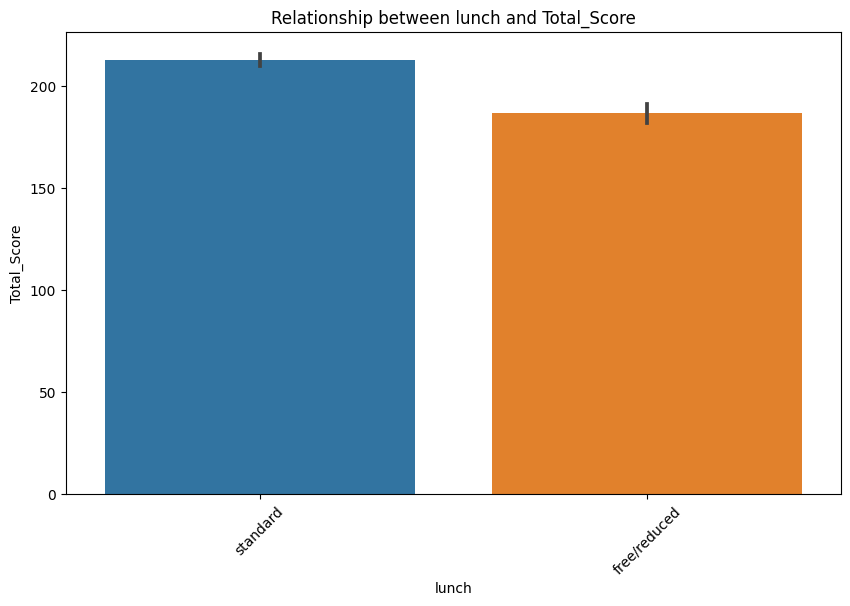

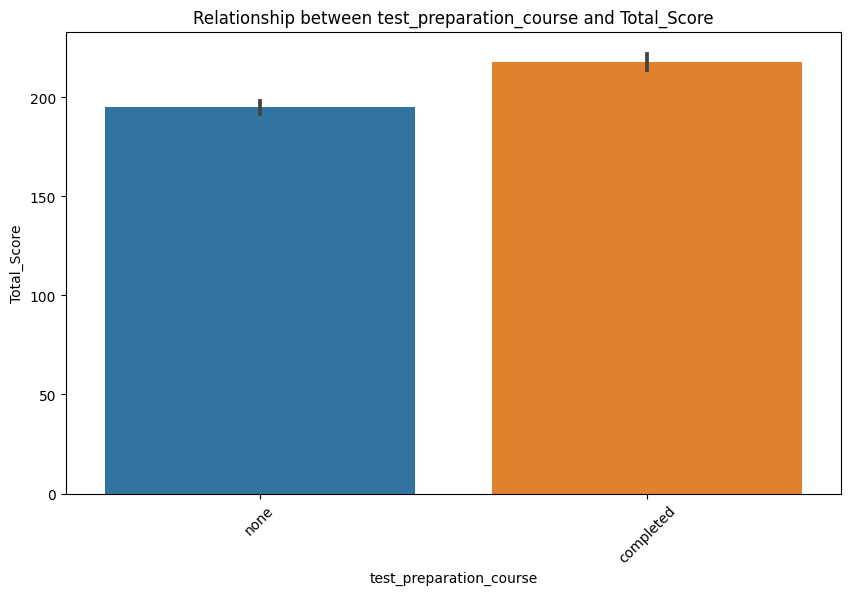

In [30]:
# Assuming you want to visualize the relationship with 'Total_Score'
target_variable_name = 'Total_Score'

# Plot bar plots for categorical features against the target variable
for column in categorical_features.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x=column, y=target_variable_name)
    plt.title(f'Relationship between {column} and {target_variable_name}')
    plt.xlabel(column)
    plt.ylabel(target_variable_name)
    plt.xticks(rotation=45)
    plt.show()


## Distribution and 5 Number Summary of each numerical column

In [32]:
pip install cufflinks

  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)
     ---------------------------------------- 0.0/139.3 kB ? eta -:--:--
     -------------------------------------- 139.3/139.3 kB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/215.0 kB ? eta -:--:--
     ------------------------------------- 215.0/215.0 kB 13.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
     --------------- ------------------------ 0.9/2.3 MB 28.7 MB/s eta 0:00:01
     --------------- ------------------------ 0.9/2.3 MB 28.7 MB/s eta 0:00:01
     ------------------------------ --------- 1.8/2.3 MB 14.0 MB/s eta 0:00:01
     ---------------------------------------  2.2/2.3 MB 13.0 MB/s eta 0:00:01
     ---------------------------------------  2.3/2.3 MB 10.3 MB/s eta 0:00:01
     ---------------------------------------- 2.3/2.3 MB 8.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to

In [34]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [36]:
import cufflinks as cf
import plotly.express as px

# Set up cufflinks to work offline
cf.go_offline()


numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Create violin plots for distribution of each numerical column
for column in numerical_columns.columns:
    fig = px.violin(numerical_columns, y=column, box=True, points="all")
    fig.update_layout(title=f'Distribution of {column}', xaxis_title=column, yaxis_title='Value')
    fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### 5 Number Summary and Relationship B/W Target and Continuous Independent Variable

In [73]:
### RELATIONSHIP B/W INDEPENDENT CONTINUOUS FEATURES AND DEPENDENT FEATURE USING SCATTERPLOT AND BOXPLOT FOR 5 NUMBER SUMMARY


import cufflinks as cf
import plotly.express as px


cf.go_offline()


numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Create box plots for distribution of each numerical column
for column in numerical_columns.columns:
    fig = px.box(numerical_columns, y=column)
    fig.update_layout(title=f'Distribution of {column} (Box Plot)', yaxis_title='Value')
    fig.show()

    # Create scatter plots for numerical column vs. Total_Score
    fig_scatter = px.scatter(numerical_columns, x=column, y='Total_Score', trendline='ols')
    fig_scatter.update_layout(title=f'{column} vs. Total_Score (Scatter Plot)', xaxis_title=column, yaxis_title='Total_Score')
    fig_scatter.show()


### Descriptive Stats

       math_score  reading_score  writing_score  Total_Score      Average
count  1000.00000    1000.000000    1000.000000  1000.000000  1000.000000
mean     66.08900      69.169000      68.054000   203.312000    67.770667
std      15.16308      14.600192      15.195657    42.771978    14.257326
min       0.00000      17.000000      10.000000    27.000000     9.000000
25%      57.00000      59.000000      57.750000   175.000000    58.333333
50%      66.00000      70.000000      69.000000   205.000000    68.333333
75%      77.00000      79.000000      79.000000   233.000000    77.666667
max     100.00000     100.000000     100.000000   300.000000   100.000000


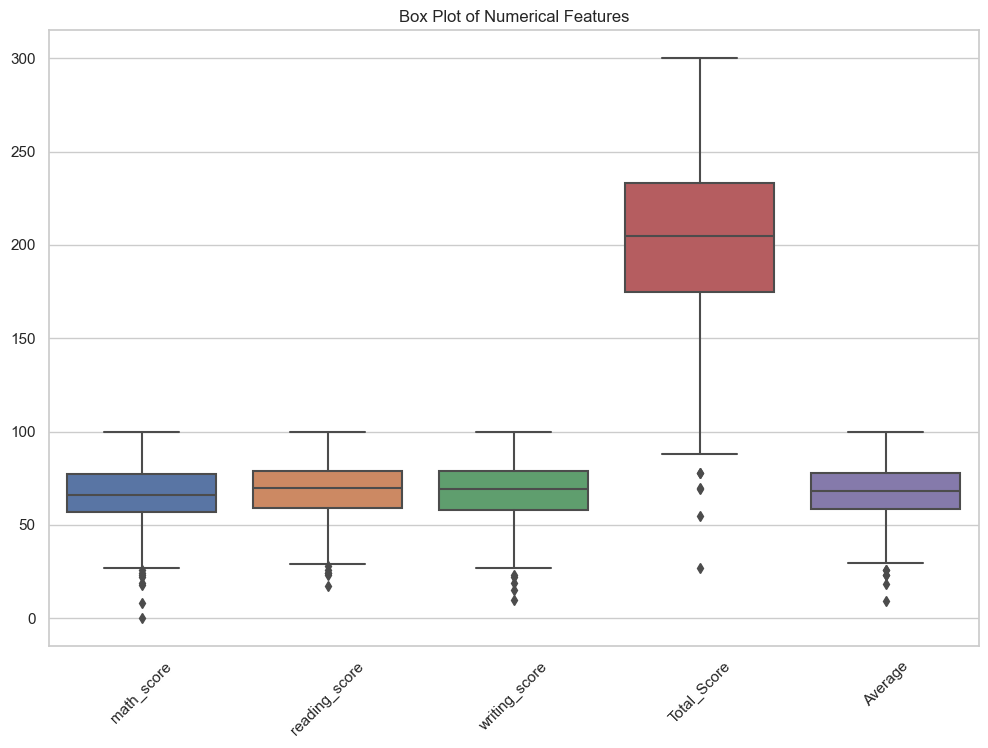

In [79]:
# Display summary statistics using describe()
description = df.describe()
print(description)

# Create box plots for numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

### Check for Outliers

In [78]:
import cufflinks as cf
import plotly.express as px

# Set up cufflinks to work offline
cf.go_offline()

# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Create box plots for each numerical feature
for column in numerical_columns.columns:
    fig = px.box(numerical_columns, y=column)
    fig.update_layout(title=f'Box Plot of {column}', yaxis_title=column)
    fig.show()


### Checking the distribution of average scores by gender


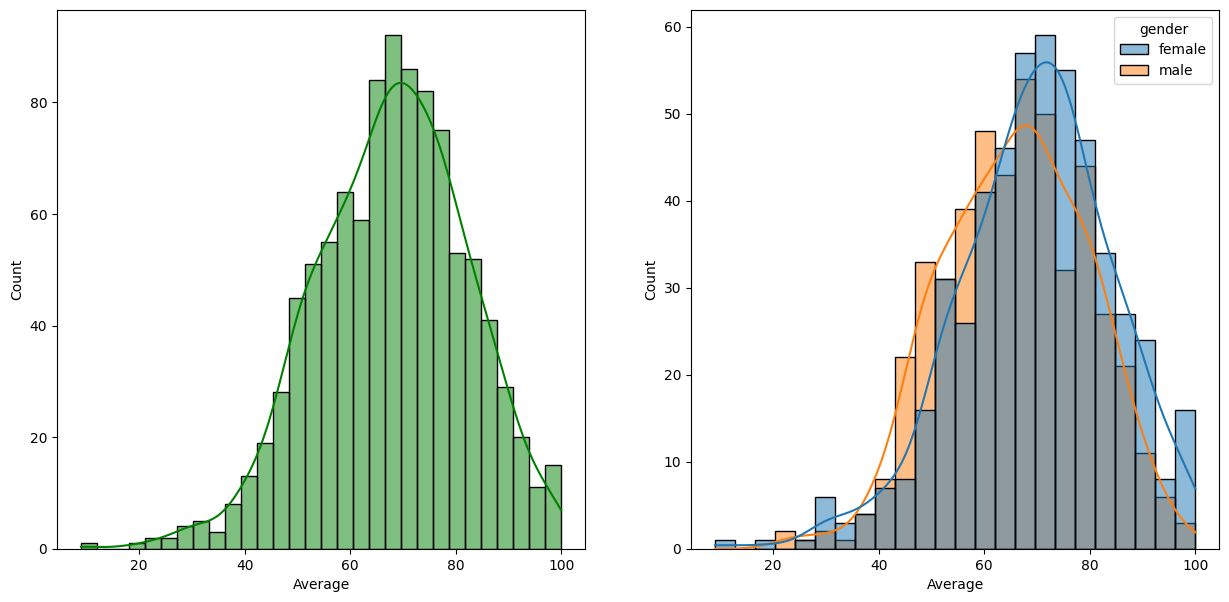

In [17]:
fig,axis = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df, x='Average',kde=True,hue='gender')
plt.show()

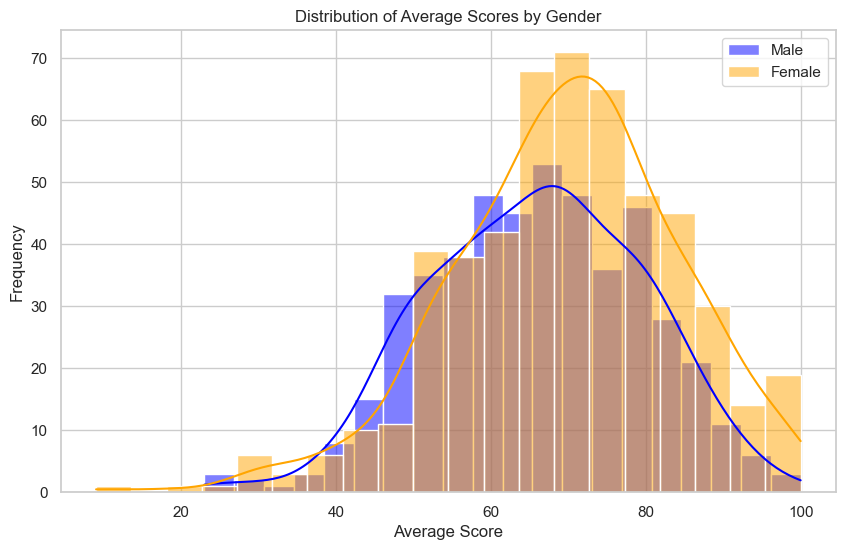

In [35]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df[df['gender'] == 'male'], x='Average', kde=True, label='Male', bins=20, color='blue')
sns.histplot(data=df[df['gender'] == 'female'], x='Average', kde=True, label='Female', bins=20, color='orange')

plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.title('Distribution of Average Scores by Gender')
plt.legend()
plt.show()


Insights

Female tend to score better than males

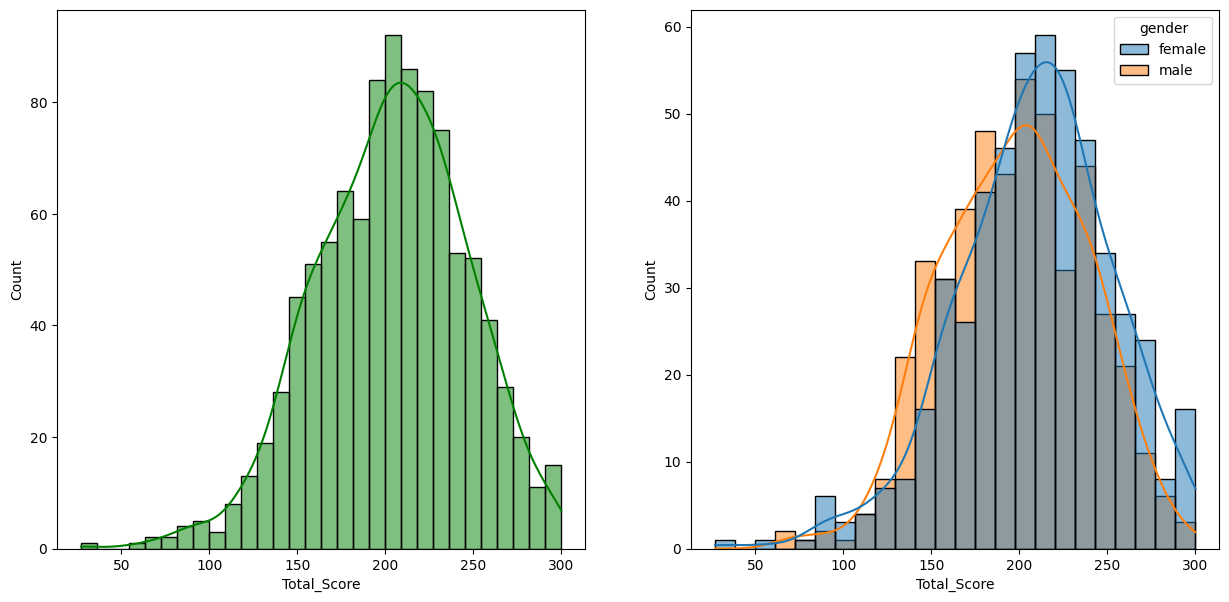

In [18]:
fig,axis = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Total_Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df, x='Total_Score',kde=True,hue='gender')
plt.show()

### Checking the distribution of total scores by Gender

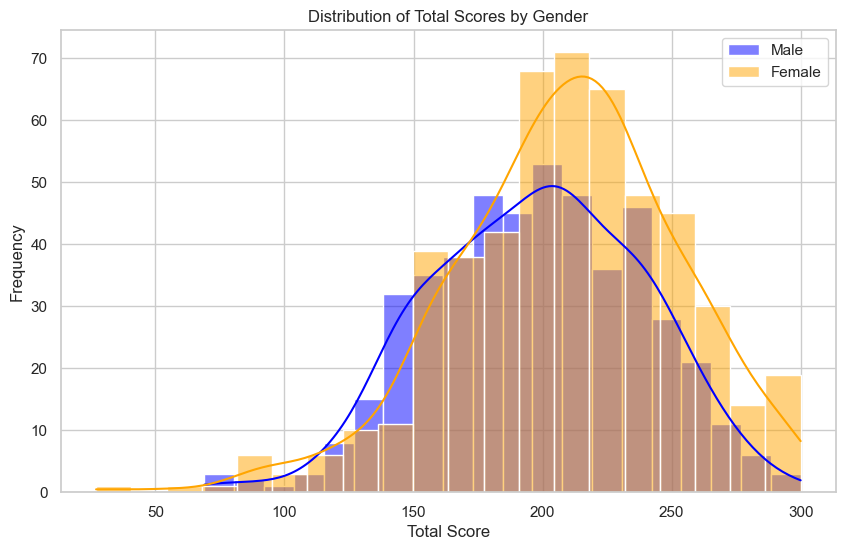

In [36]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df[df['gender'] == 'male'], x='Total_Score', kde=True, label='Male', bins=20, color='blue')
sns.histplot(data=df[df['gender'] == 'female'], x='Total_Score', kde=True, label='Female', bins=20, color='orange')

plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.title('Distribution of Total Scores by Gender')
plt.legend()
plt.show()


### Effect of Test Preparation on Total Scores for M/F

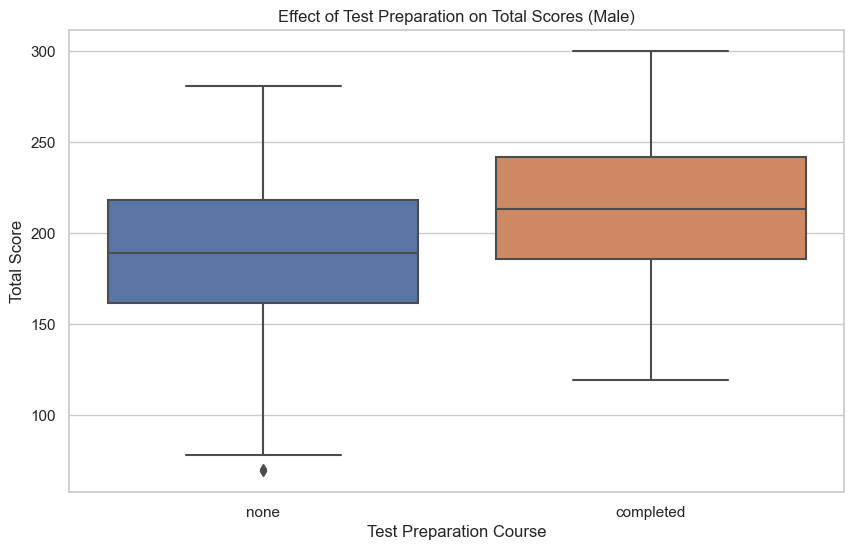

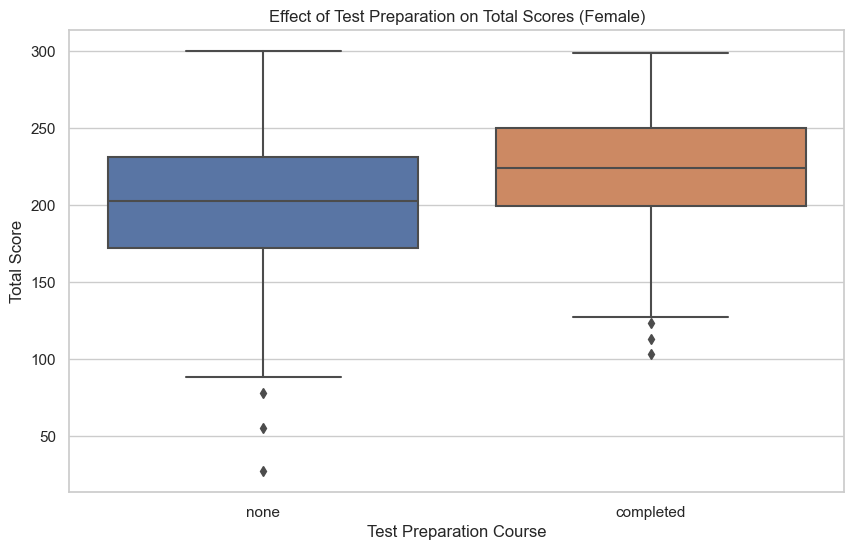

In [37]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df[df['gender'] == 'male'], x='test_preparation_course', y='Total_Score')
plt.xlabel('Test Preparation Course')
plt.ylabel('Total Score')
plt.title('Effect of Test Preparation on Total Scores (Male)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['gender'] == 'female'], x='test_preparation_course', y='Total_Score')
plt.xlabel('Test Preparation Course')
plt.ylabel('Total Score')
plt.title('Effect of Test Preparation on Total Scores (Female)')
plt.show()


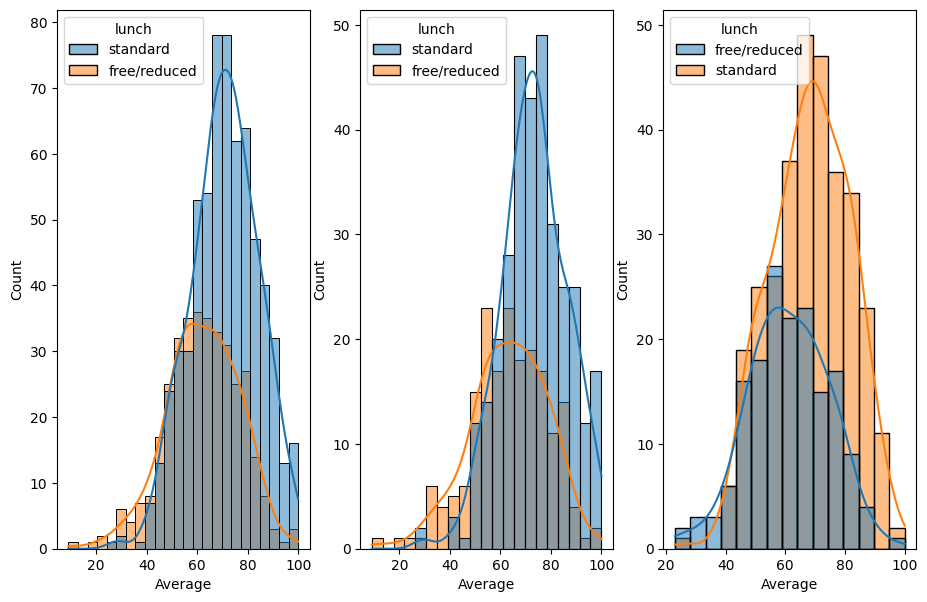

In [19]:
fig,axis = plt.subplots(1,3, figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == "female"], x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == "male"], x='Average',kde=True,hue='lunch')
plt.show()

Insights:

Standard lunch helps perform better in exams, that too for both males and females

### Impact of Parental Education on Total Scores

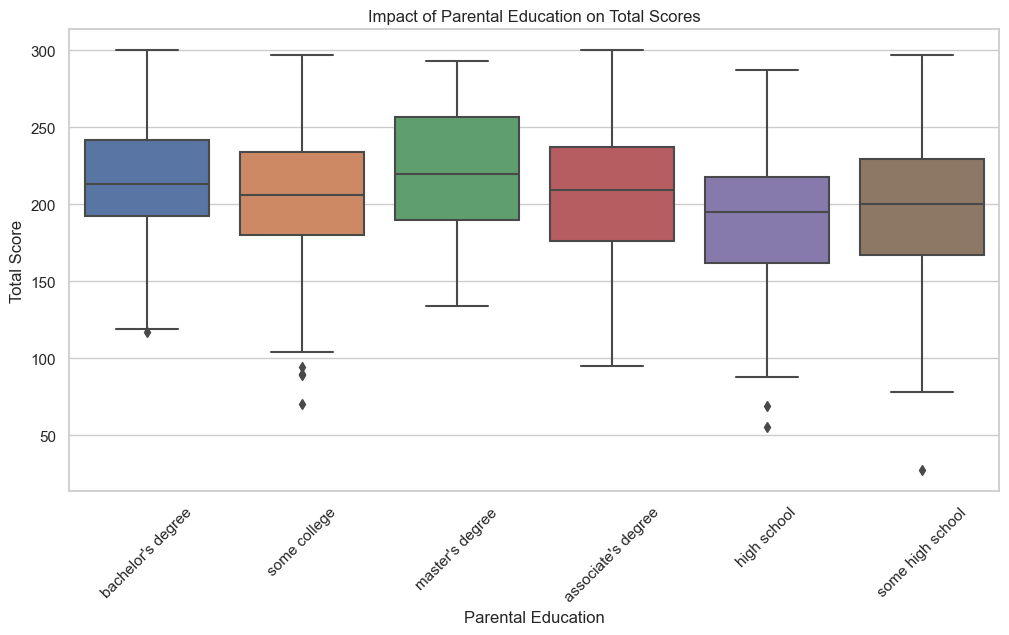

In [41]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df, x='parental_level_of_education', y='Total_Score')
plt.xticks(rotation=45)
plt.xlabel('Parental Education')
plt.ylabel('Total Score')
plt.title('Impact of Parental Education on Total Scores')
plt.show()


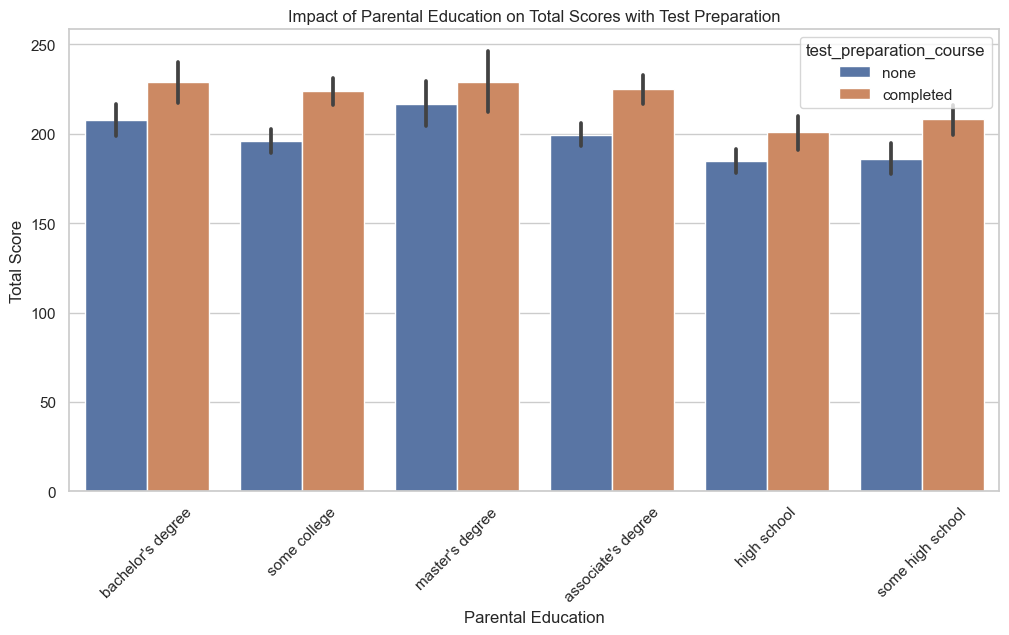

In [43]:
plt.figure(figsize=(12, 6))

sns.barplot(data=df, x='parental_level_of_education', y='Total_Score', hue='test_preparation_course')
plt.xticks(rotation=45)
plt.xlabel('Parental Education')
plt.ylabel('Total Score')
plt.title('Impact of Parental Education on Total Scores with Test Preparation')
plt.show()


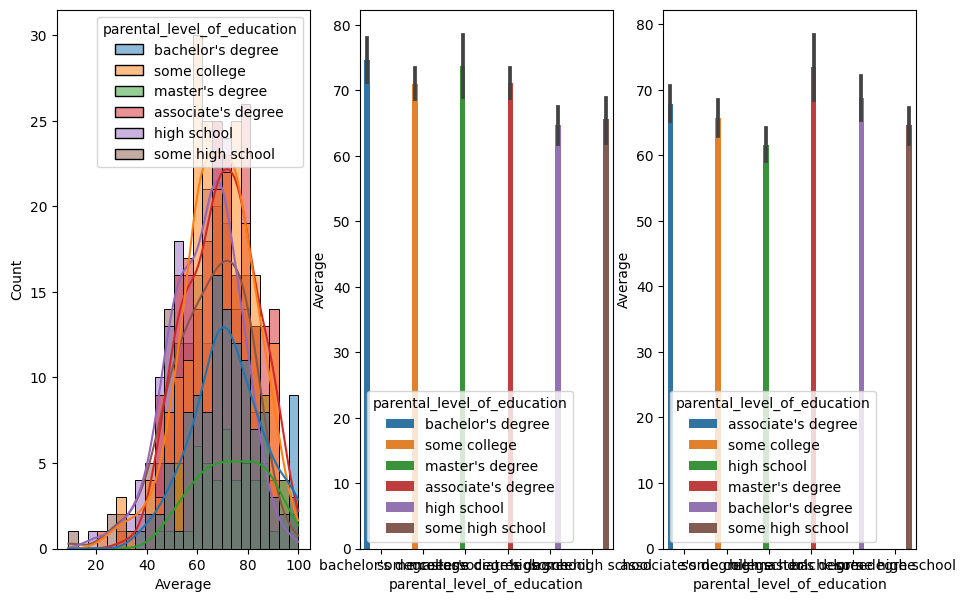

In [20]:
fig,axis = plt.subplots(1,3, figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True, hue='parental_level_of_education')
plt.subplot(142)
sns.barplot(data=df[df.gender == "female"],x = 'parental_level_of_education' ,y='Average',hue='parental_level_of_education')
plt.subplot(143)
sns.barplot(data=df[df.gender == "male"], x = 'parental_level_of_education' ,y='Average',hue='parental_level_of_education')
plt.show()

Insights:

1. Parents college degree don't help students to perform well
2. For male, parents with masters or associate degree tend to score well
3. For female, there is hardly any effect of parents degree


#### Impact of Parental Education on Total Scores by Ethnicity

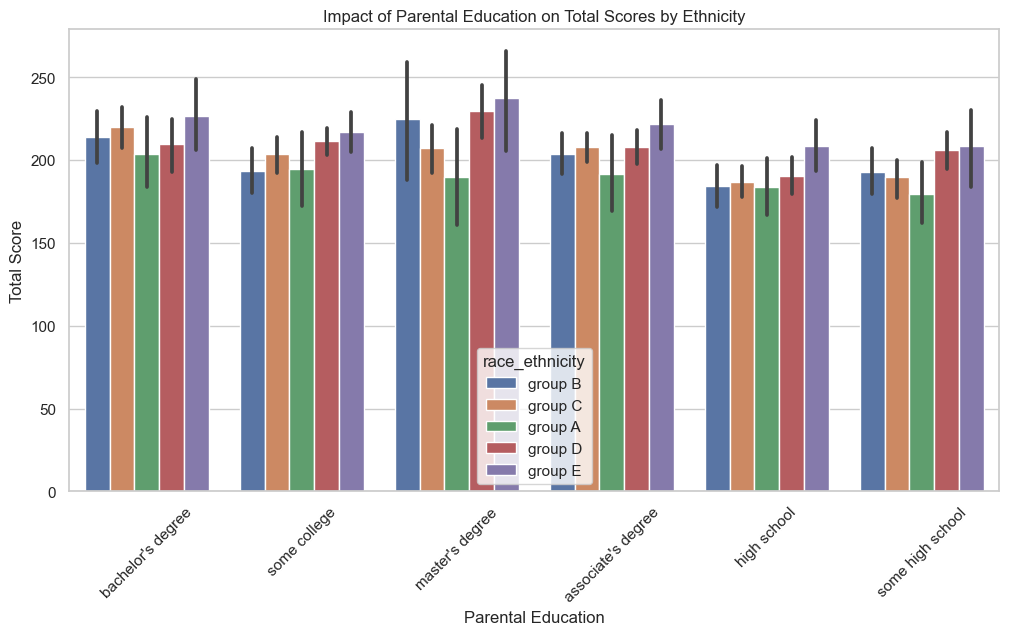

In [45]:
plt.figure(figsize=(12, 6))

sns.barplot(data=df, x='parental_level_of_education', y='Total_Score', hue='race_ethnicity')
plt.xticks(rotation=45)
plt.xlabel('Parental Education')
plt.ylabel('Total Score')
plt.title('Impact of Parental Education on Total Scores by Ethnicity')
plt.show()


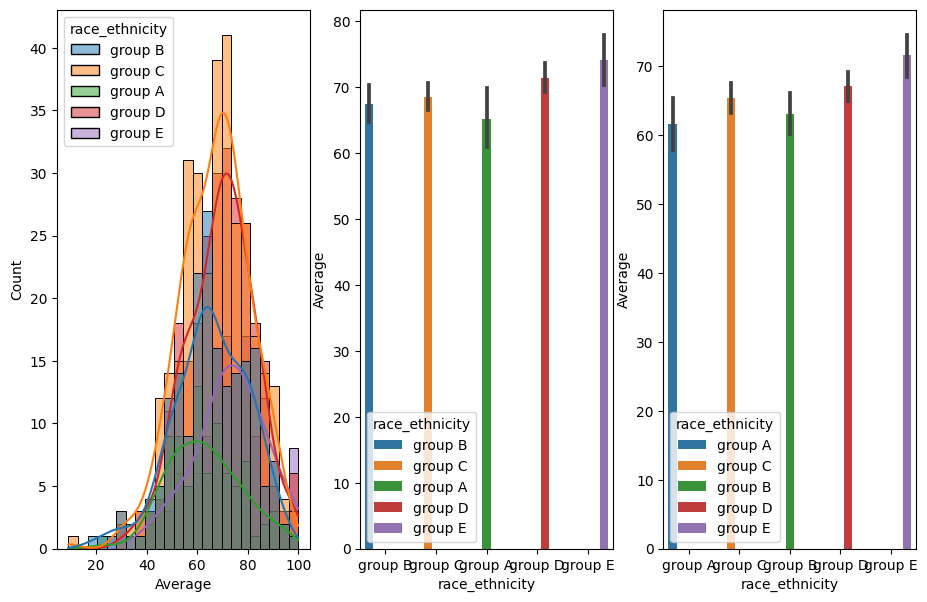

In [21]:
fig,axis = plt.subplots(1,3, figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True, hue='race_ethnicity')
plt.subplot(142)
sns.barplot(data=df[df.gender == "female"],x = 'race_ethnicity' ,y='Average',hue='race_ethnicity')
plt.subplot(143)
sns.barplot(data=df[df.gender == "male"], x = 'race_ethnicity' ,y='Average',hue='race_ethnicity')
plt.show()

Insights:
1. Group A and Group B tend to score less in exams, whether male or female

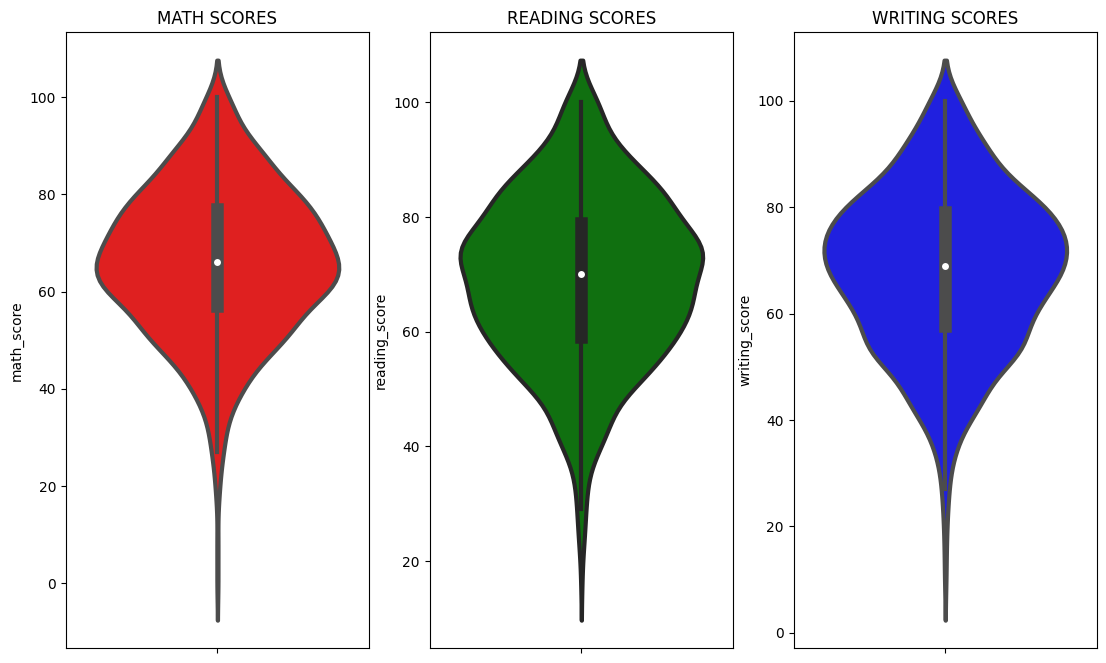

In [22]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

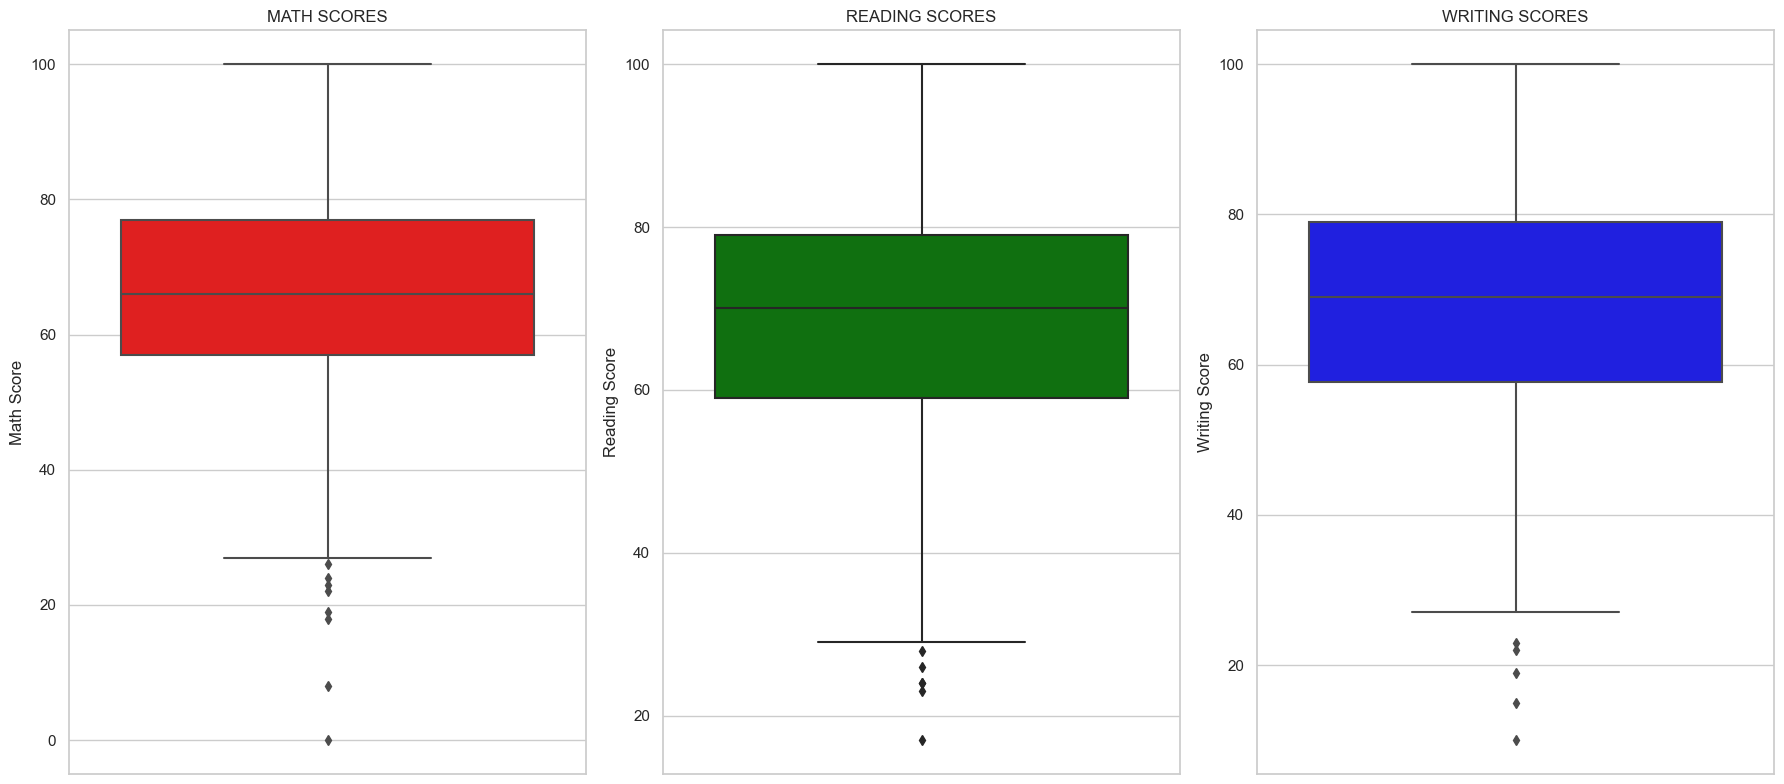

In [46]:
plt.figure(figsize=(18, 8))

# Math Scores
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.boxplot(y='math_score', data=df, color='red')
plt.ylabel('Math Score')

# Reading Scores
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.boxplot(y='reading_score', data=df, color='green')
plt.ylabel('Reading Score')

# Writing Scores
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.boxplot(y='writing_score', data=df, color='blue')
plt.ylabel('Writing Score')

plt.tight_layout()
plt.show()


Insights:
1. In maths, most students score between 60-80, while in reading and writing most students score between 50-80

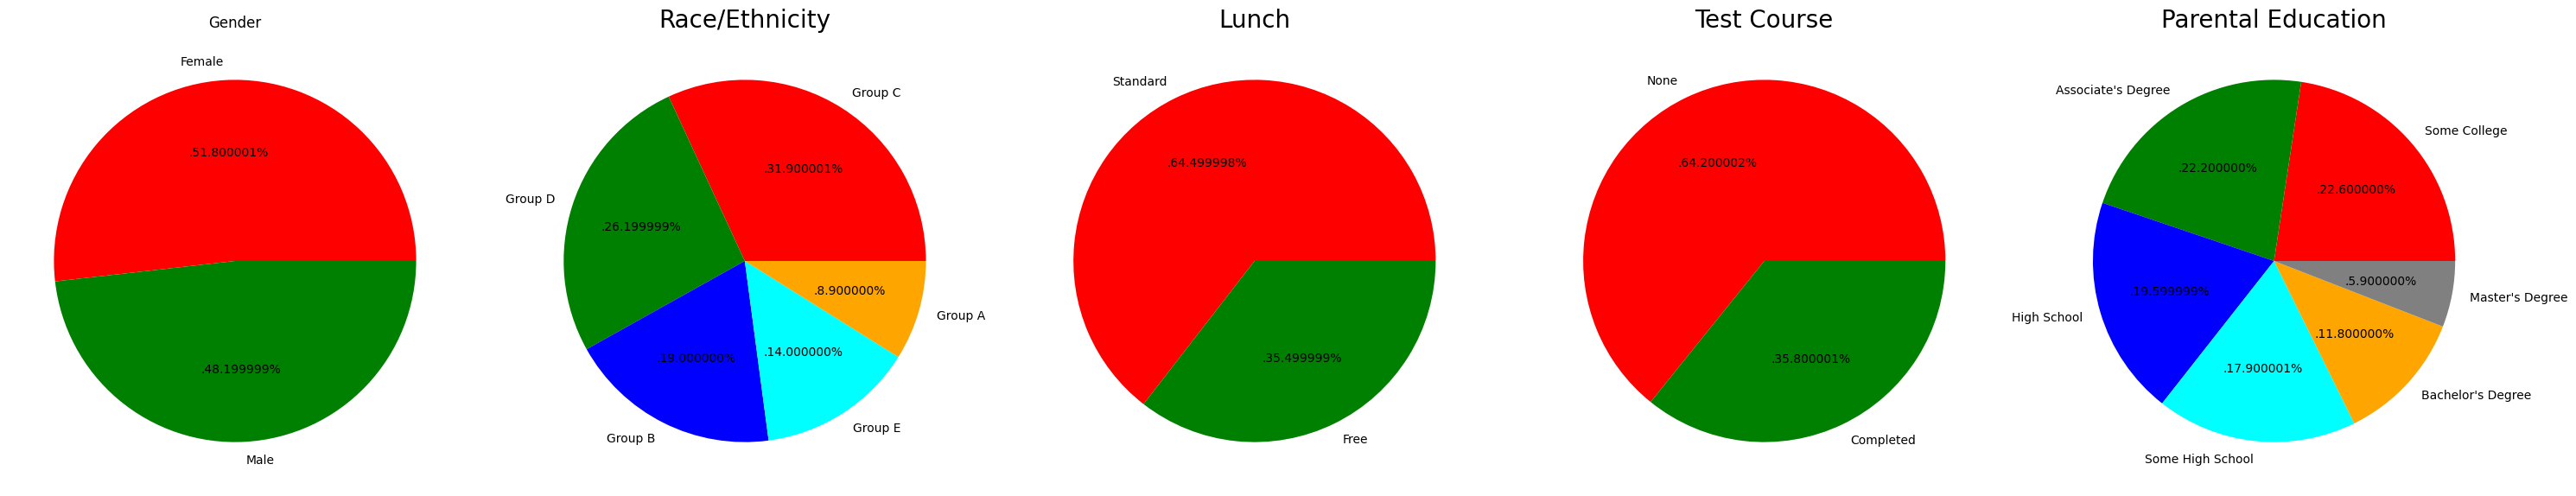

In [23]:
# Multivariate analysis using pieplot

plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Gender')
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights:
1. Number of Male and Female students are almost equal
2. Number students are more in Group C
3. Students prefer Standard Lunch
4. Number of students who did not enrolled for Test Course are higher
5. Number of students whose parental education is "some college" are highest closely followed by Associate Degree

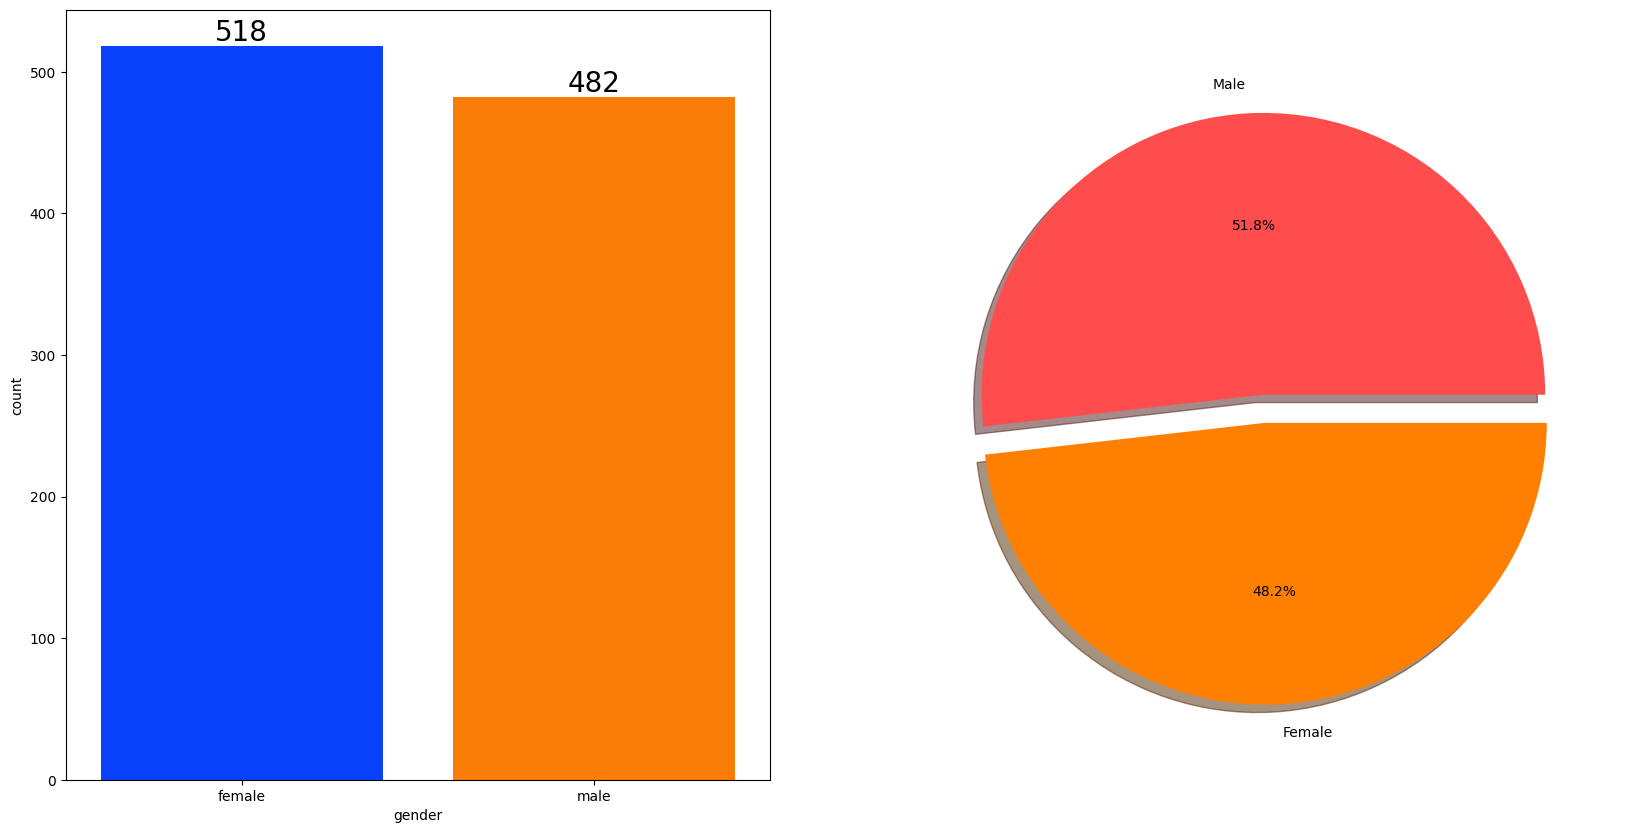

In [24]:
#Gender

f,ax = plt.subplots(1,2, figsize=(20,10))

sns.countplot(x=df['gender'], data=df, palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels = ['Male','Female'],explode=[0,0.1],autopct = '%1.1f%%',shadow=True, colors=['#ff4d4d','#ff8000'])
plt.show()

In [25]:
# Does gender has any impact on student performance?
gender_group = df[numeric_features + ['gender','Average','Total_Score'] ].groupby('gender').mean()
gender_group

math_score  reading_score  writing_score    Average  Total_Score
gender                                                                  
female   63.633205      72.608108      72.467181  69.569498   208.708494
male     68.728216      65.473029      63.311203  65.837483   197.512448

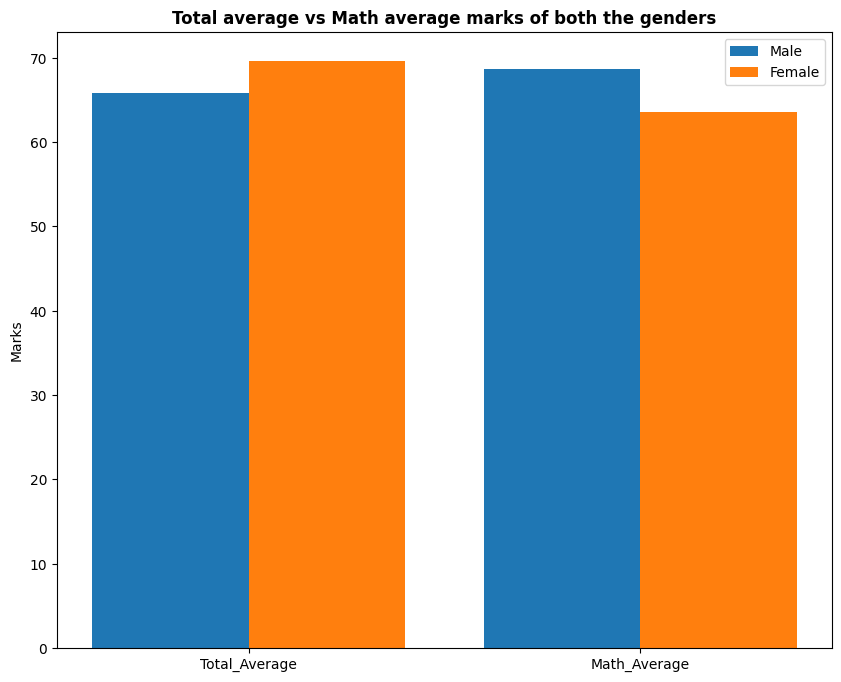

In [26]:
plt.figure(figsize = (10,8))

X = ['Total_Average','Math_Average']

female_score = [gender_group['Average'][0],gender_group['math_score'][0]]
male_score = [gender_group['Average'][1],gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_score, 0.4, label="Male")
plt.bar(X_axis + 0.2, female_score,0.4, label = 'Female')

plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title("Total average vs Math average marks of both the genders", fontweight = 'bold')
plt.legend()
plt.show()

Insights:

1. Overall females have better scores than men
2. But in Maths, men avg score are greater than females

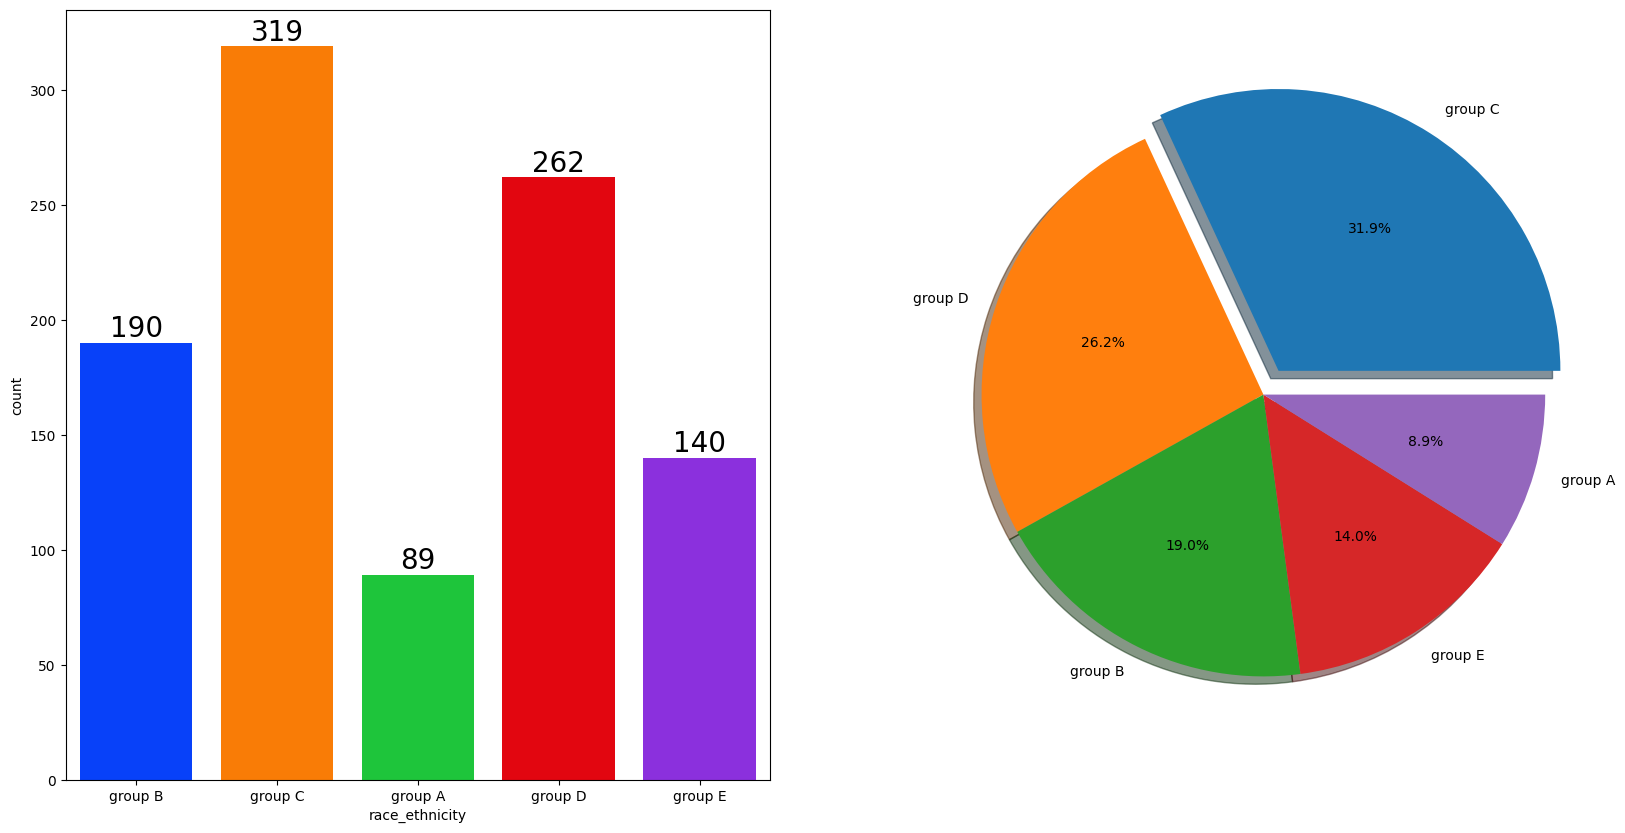

In [27]:
#Race/Ethnicity

f,ax = plt.subplots(1,2, figsize=(20,10))

sns.countplot(x=df['race_ethnicity'], data=df, palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race_ethnicity'].value_counts(),labels = df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

Insights:

1. Majority of the students belong from Group C
2. Lowest number of students belong from Group A

In [28]:
Group_data2 = df.groupby('race_ethnicity')

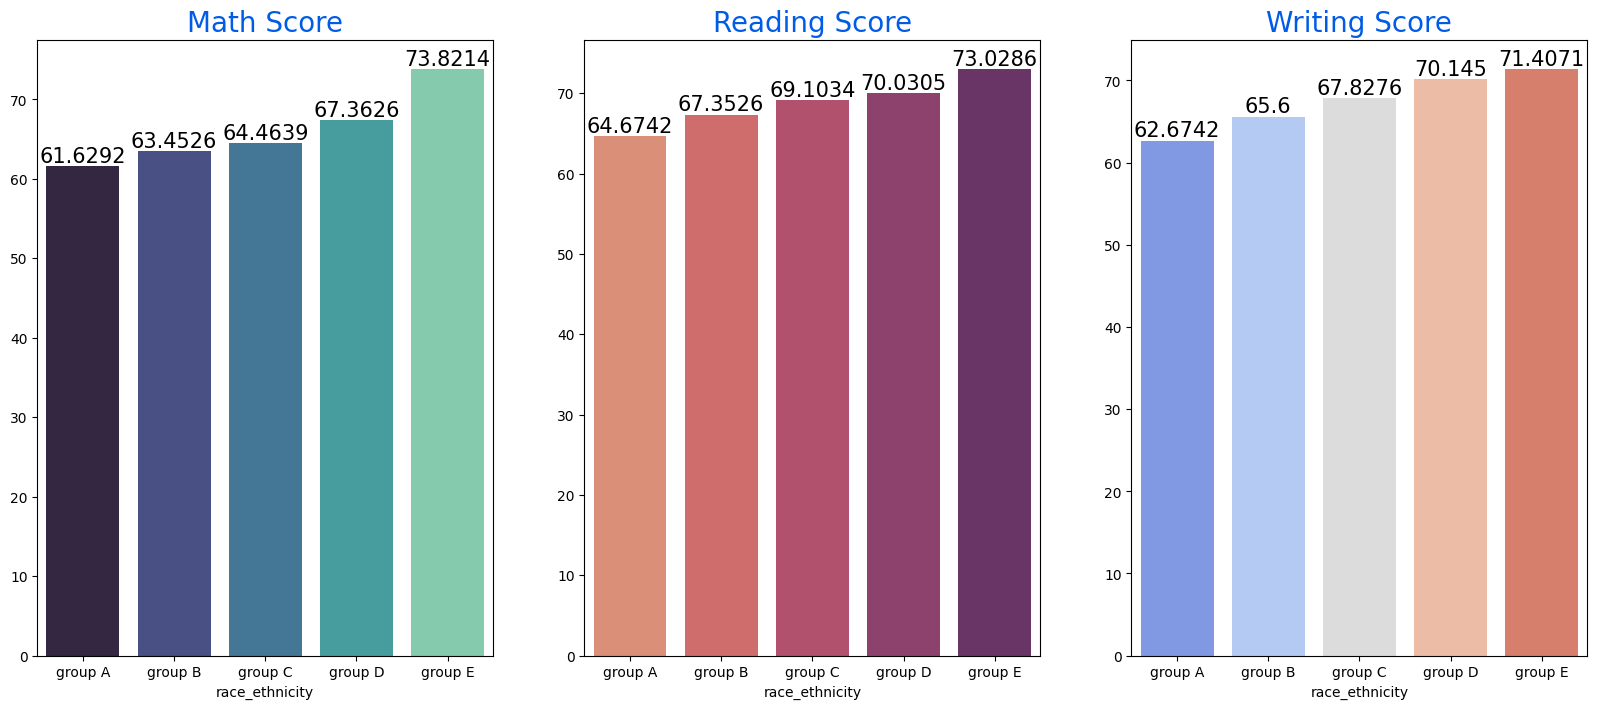

In [29]:
#Does race_ethnicity impacts student Performance?

f,ax = plt.subplots(1,3,figsize = (20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values, palette='mako', ax = ax[0])
ax[0].set_title("Math Score",color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color = 'black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values, palette='flare', ax = ax[1])
ax[1].set_title("Reading Score",color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', size=15)

sns.barplot(x = Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values, palette = 'coolwarm', ax = ax[2] )
ax[2].set_title('Writing Score', color = '#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)



Insights:

1. Group E students have the highest marks
2. Group A students have the lowest marks
3. Students from lower socioeconomic group have lower avg score

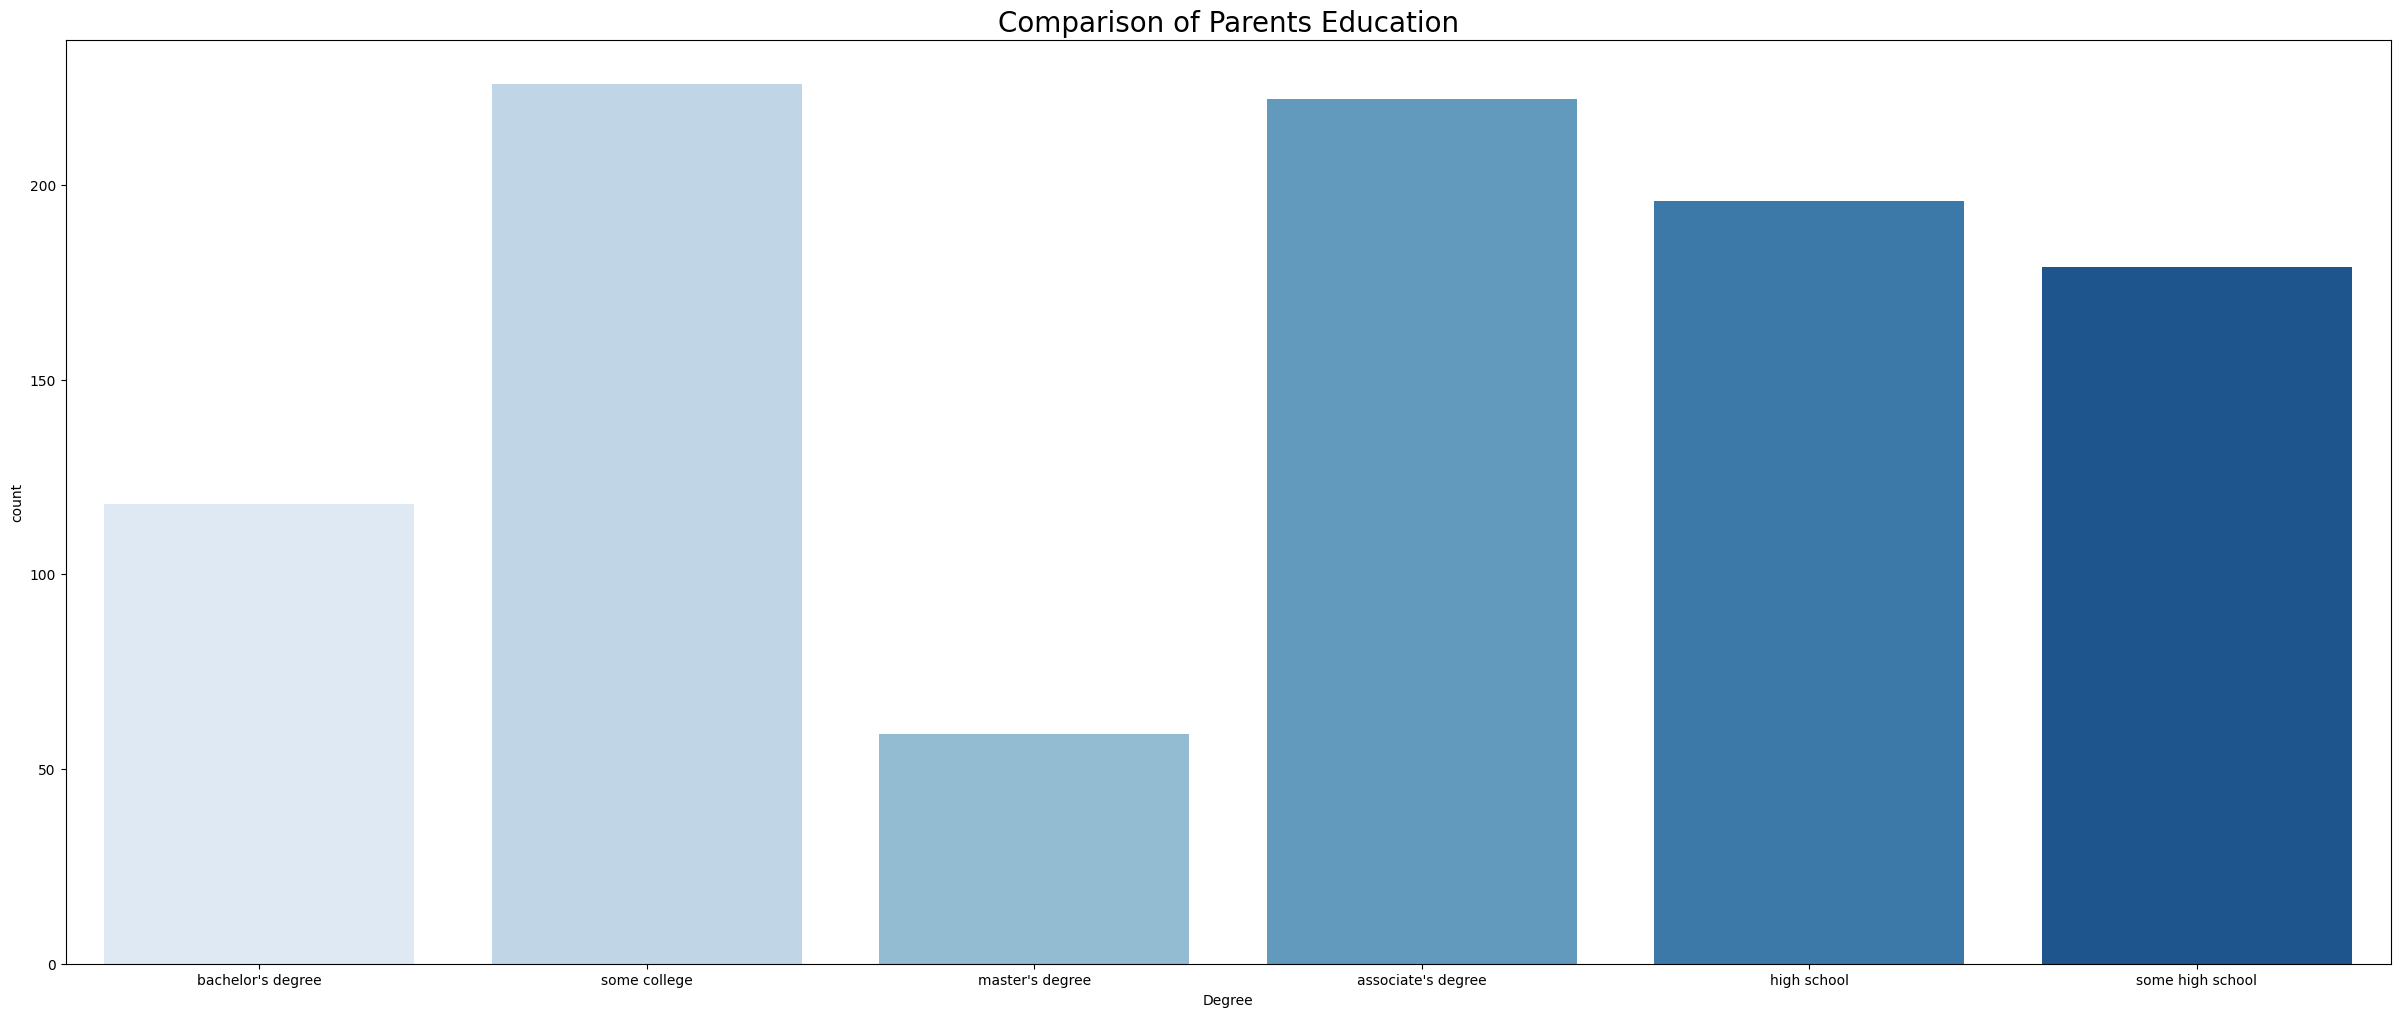

In [30]:
sns.countplot(x = df['parental_level_of_education'], palette='Blues')
plt.title('Comparison of Parents Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Insights:

Largest number of parents are from Some College

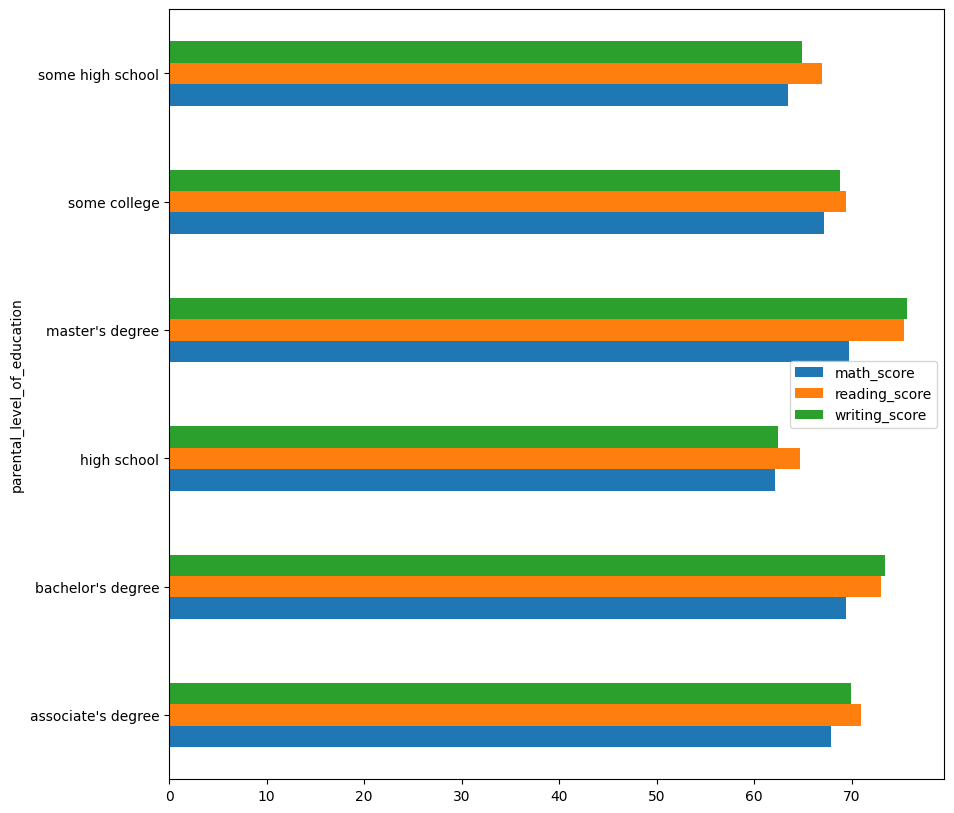

In [31]:
# Parents Education impact on Student's Perfomance
df.groupby('parental_level_of_education')[numeric_features].mean().plot(kind = 'barh',figsize=(10,10))
plt.legend()
plt.show()

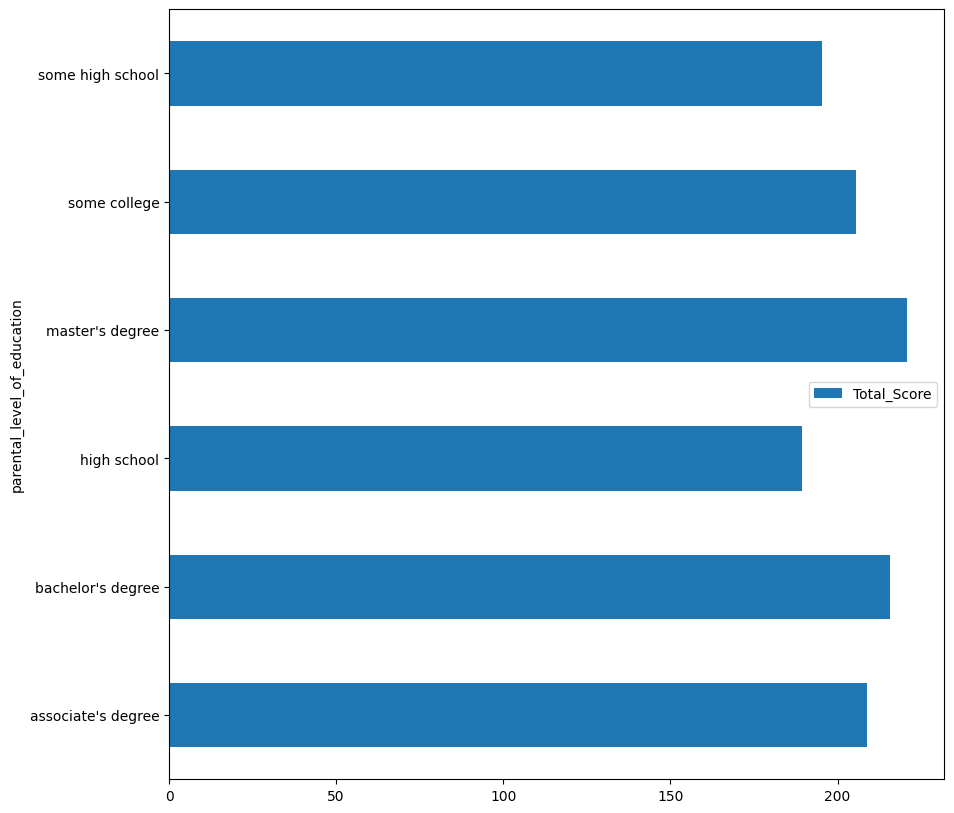

In [32]:
df.groupby('parental_level_of_education')['Total_Score'].mean().plot(kind = 'barh',figsize=(10,10))
plt.legend()
plt.show()

Insights:

1. Score of students are higher whose parents who possess bachelor's or master's degree

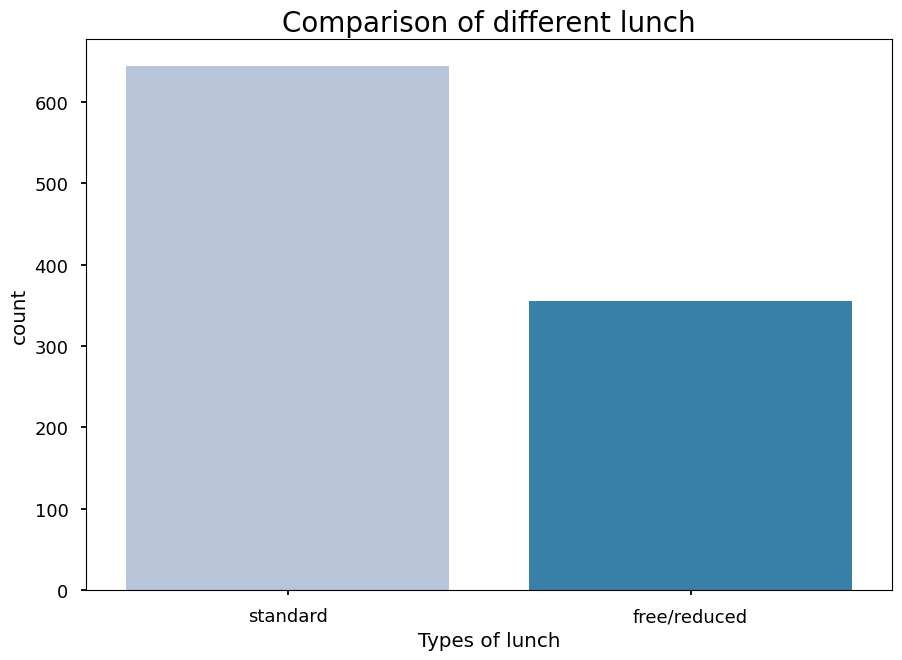

In [33]:
# Lunch Analysis

plt.rcParams['figure.figsize'] = (15,6)
plt.style.use('seaborn-talk')
sns.countplot(data=df,x='lunch',palette='PuBu')
plt.title('Comparison of different lunch', fontweight = 30, fontsize = 20)
plt.xlabel('Types of lunch')
plt.ylabel('count')
plt.show()

Insights:

1. Students being served standard lunch is more than free/reduced lunch

<Axes: xlabel='lunch', ylabel='Average'>

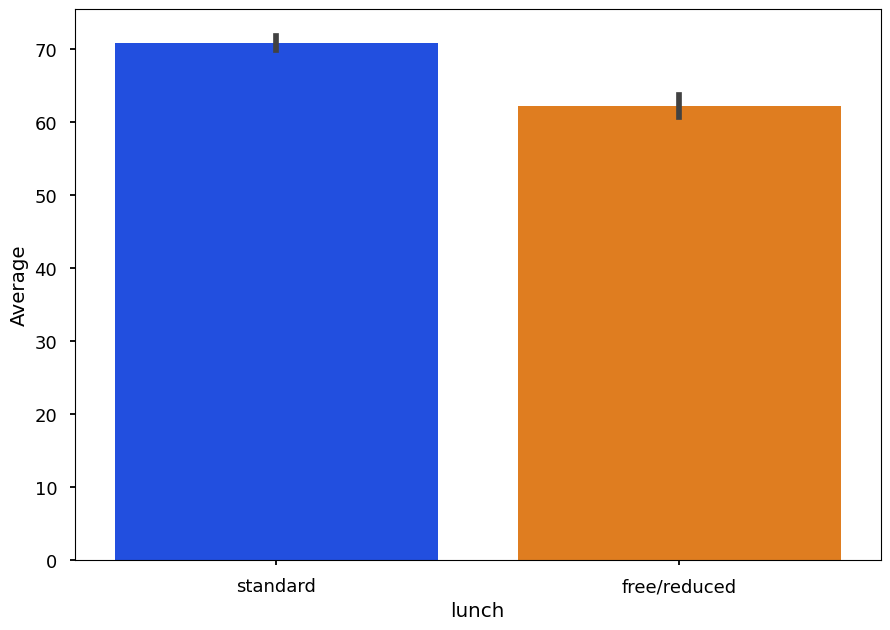

In [38]:
sns.barplot(x = df['lunch'],y=df['Average'], data = df, palette = 'bright' )

Insights:

1. Students with standard lunch score better than free/reduced lunch

<Axes: xlabel='lunch', ylabel='writing_score'>

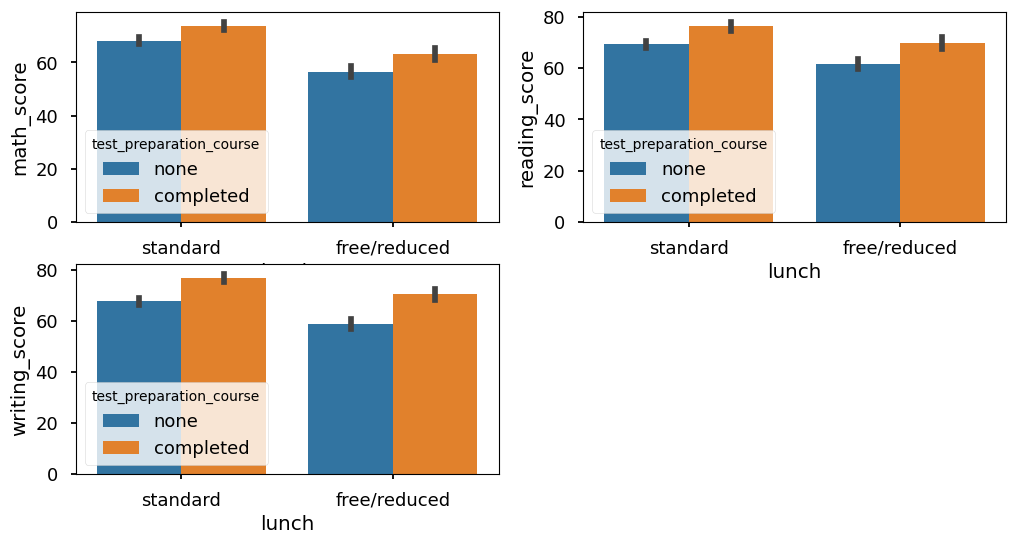

In [39]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x = df['lunch'], y = df['math_score'],hue = df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot(x = df['lunch'], y = df['reading_score'],hue = df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot(x = df['lunch'], y = df['writing_score'],hue = df['test_preparation_course'])

Insights:

1. Students who have completed the test course, score more in all the three categories

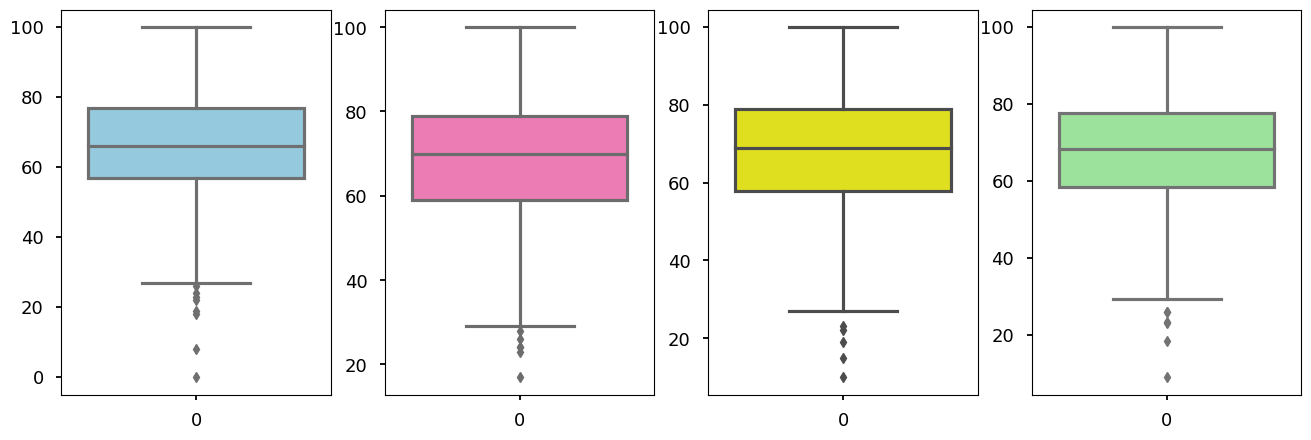

In [41]:
plt.subplots(1,4,figsize= (16,5))
plt.subplot(141)
sns.boxplot(df['math_score'], color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'], color = 'hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'], color = 'yellow')
plt.subplot(144)
sns.boxplot(df['Average'], color ='lightgreen')
plt.show()

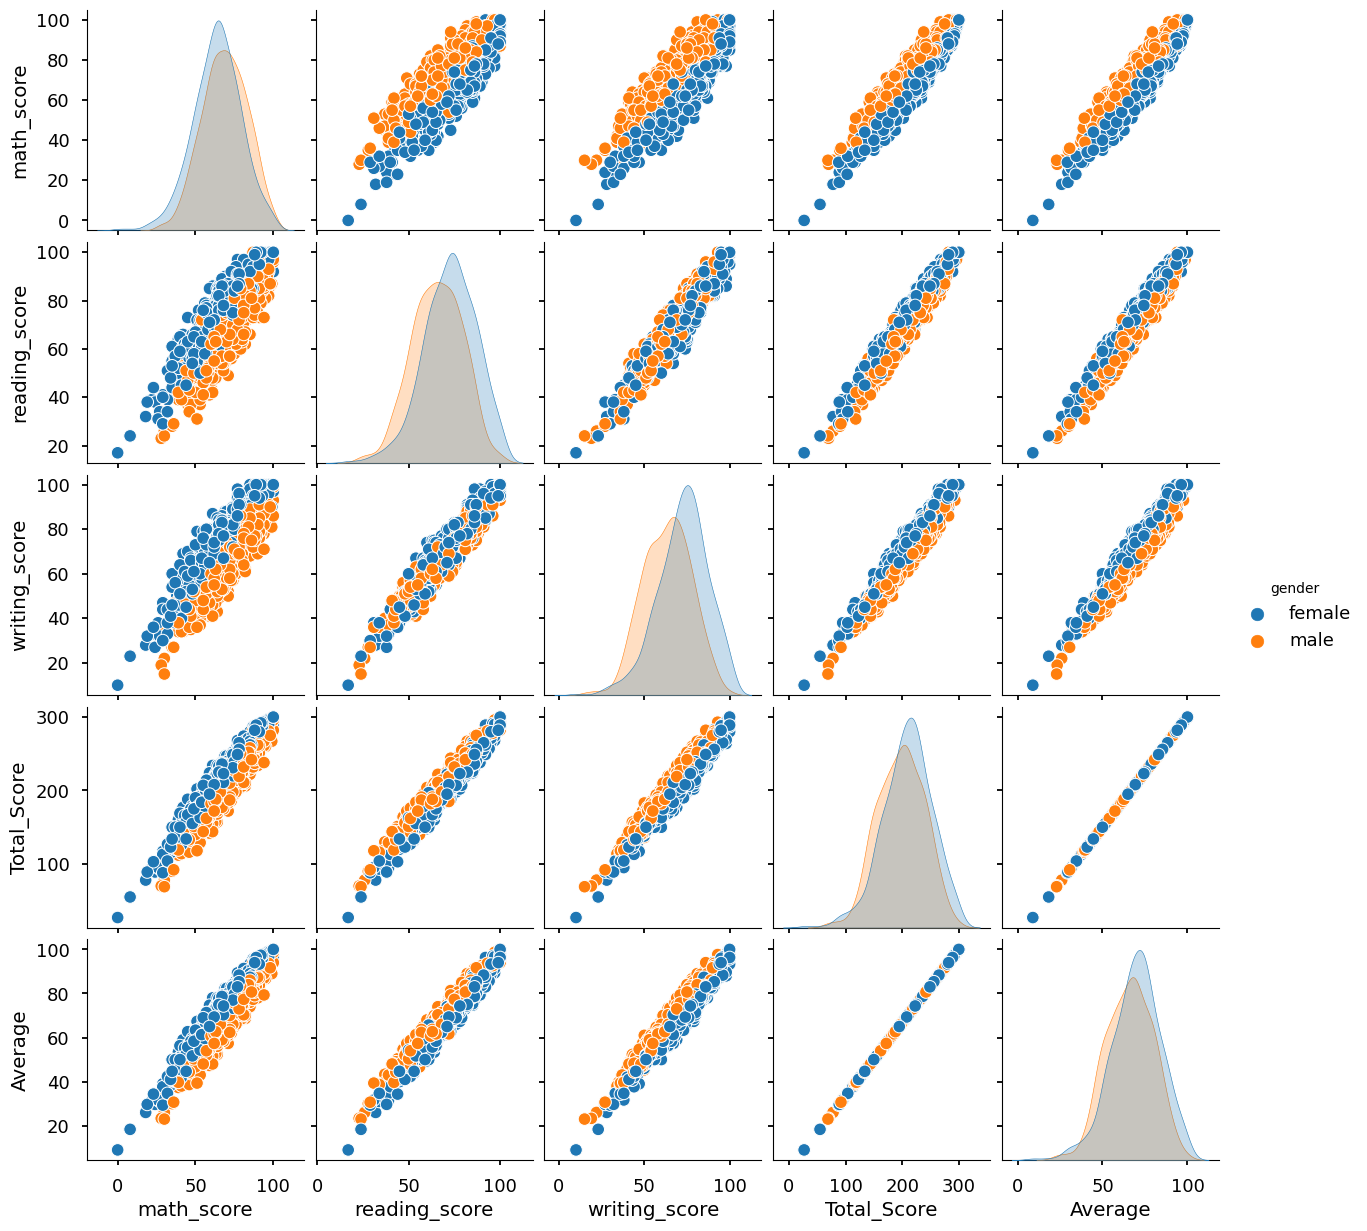

In [43]:
sns.pairplot(df, hue= 'gender')
plt.show()

Insights:

All the scores increase linearly

### Use heatmap to view the intensity of correlation

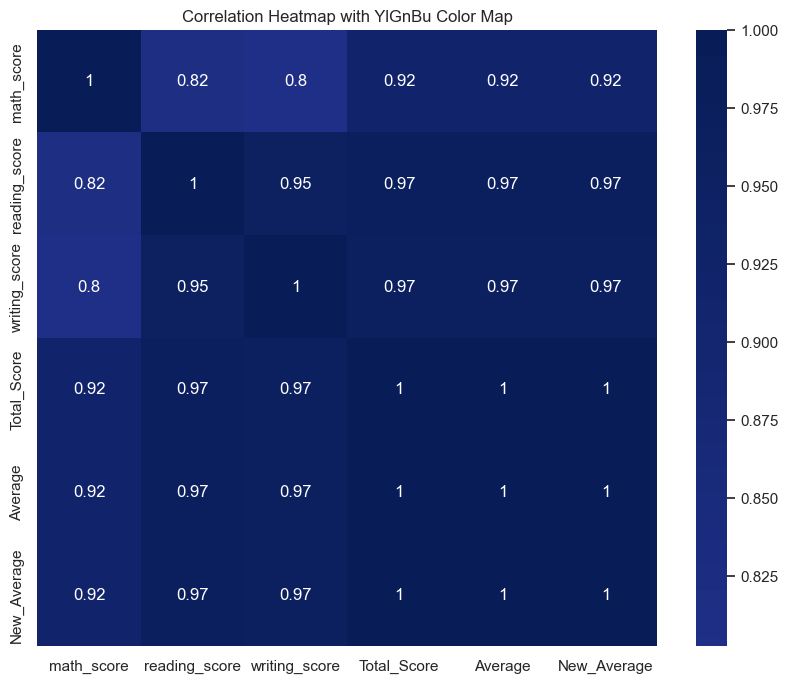

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', center=0)
plt.title('Correlation Heatmap with YlGnBu Color Map')
plt.show()
